## Using Selenium

### Importing all the required libraries.

In [101]:
import pandas as pd
import selenium
import os
import io
import time
from bs4 import BeautifulSoup

#Importing requests
import requests

# Importing selenium webdriver
from selenium import webdriver

#Importing Exceptions which needs to be handled
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException
from selenium.common.exceptions import ElementClickInterceptedException, ElementNotInteractableException

#Importing regex
import re

#Import image
from PIL import Image

In [102]:
# connecting with the webdriver

driver = webdriver.Chrome('chromedriver.exe')

#### Q. No. 1:- Write a python program which searches all the product under a particular product vertical from www.amazon.in. The product verticals to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

In [3]:
# Loading the webpage
url1 = 'https://www.amazon.in'
driver.get(url1)

In [4]:
product_vertical = input ('Enter the product name: ')

pv = product_vertical
pv

Enter the product name: Guitar


'Guitar'

In [5]:
# Extracting the web element of the search bar
src_tag1 = driver.find_element_by_xpath('//input[@class="nav-input nav-progressive-attribute"]')
src_tag1.send_keys(pv)
time.sleep(2)

#Clicking on the search button
src_btn1 = driver.find_element_by_id("nav-search-submit-button")
src_btn1.click()

#### Q.No. 2 :- In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product vertical has less than 3 pages in search results then scrape all the products available under that product vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [6]:
# Creating empty list

url_product = []
product_name = []
rating_product = []
number_rating = []
price_product = []
return_date = []
expected_delivery = []
availability_product = []
other_details = []
time.sleep(2)

In [7]:
# Scraping URLs of page 1.
# Extracting the url of each products
url_p = driver.find_elements_by_xpath('//a[@class="a-link-normal a-text-normal"]')
url_p1 = []

for u1 in url_p:
    url_p1.append(u1.get_attribute('href'))
time.sleep(5)

# Scraping the product URLs from page 2.
# Clicking on the 2nd page button
page2 = driver.find_element_by_xpath('//li[@class="a-last"]')
page2.click()
time.sleep(2)

url_t2 = driver.find_elements_by_xpath('//a[@class="a-link-normal a-text-normal"]')
url_p2 = []
for u2 in url_t2:
    url_p2.append(u2.get_attribute('href'))
time.sleep(5)

# Scraping the product URLs from page 3.
# Clicking on the 3rd page button
page3 = driver.find_element_by_xpath('//li[@class="a-last"]')
page3.click()
time.sleep(2)

url_t3 = driver.find_elements_by_xpath('//a[@class="a-link-normal a-text-normal"]')
url_p3 = []
for u3 in url_t3:
    url_p3.append(u3.get_attribute('href'))
time.sleep(5)

url_product = url_p1 + url_p2 + url_p3
url_product

['https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A1014165B8UBH8CKTNHL&url=%2FIntern-INT-38C-Acoustic-Guitar-Black%2Fdp%2FB073B6TQQY%2Fref%3Dsr_1_1_sspa%3Fdchild%3D1%26keywords%3DGuitar%26qid%3D1627192111%26sr%3D8-1-spons%26psc%3D1&qualifier=1627192111&id=6513725544633025&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A05211881ZGJIHX360ZMV&url=%2FKadence-Frontier-Acoustic-Guitar-Equalizer%2Fdp%2FB01HRIHJWY%2Fref%3Dsr_1_2_sspa%3Fdchild%3D1%26keywords%3DGuitar%26qid%3D1627192111%26sr%3D8-2-spons%26psc%3D1&qualifier=1627192111&id=6513725544633025&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A10146951FP9ERONSUCKK&url=%2FKadence-Acoustica-Ash-Wood-Equlizer%2Fdp%2FB0757H5P13%2Fref%3Dsr_1_3_sspa%3Fdchild%3D1%26keywords%3DGuitar%26qid%3D1627192111%26sr%3D8-3-spons%26psc%3D1%26smid%3DA3HL8HT148CJU9&qual

In [8]:
len(url_product)

185

In [9]:
# Scraping product name
for u2 in url_product:
    driver.get(u2)
    
    prdt_nme = driver.find_elements_by_xpath('//span[@class="a-size-large product-title-word-break"]')
    for p1 in prdt_nme:
        if p1.text is None:
            product_name.append('--')
        else:
            product_name.append(p1.text)
            
product_name

['Intern INT-38C Acoustic Guitar Kit, With Bag, Strings, Pick And Strap, Black',
 'Kadence Frontier Jumbo Semi Acoustic Guitar With Die Cast Keys,Super Combo (Bag, 1 pack Strings, Strap, Picks, Capo, Tuner (black & stand)',
 'Kadence Acoustica Series Semi Acoustic Ash Wood with Equlizer A-06 (Guitar)',
 'Juârez Acoustic Guitar, 38 Inch Cutaway, 038C with Bag, Strings, Pick and Strap, Black',
 'Juârez Acoustic Guitar, 38 Inch Cutaway, 038C with Bag, Strings, Pick and Strap, Black',
 'Juarez JRZ38C Acoustic Guitar, 38 Inch Cutaway with Bag (TBS Transparent Blue Sunburst)',
 'Intern INT-38C Acoustic Guitar Kit, With Bag, Strings, Pick And Strap, Black',
 'Kadence Acoustica Series Semi Acoustic Ash Wood with Equlizer A-06 (Guitar)',
 'Juârez Acoustic Guitar, 38 Inch Cutaway, 038C with Bag, Strings, Pick and Strap, Black',
 'Intern INT-38C Acoustic Guitar Kit, With Bag, Strings, Pick And Strap, Black',
 'JUAREZ JRZ38C Right Handed Acoustic Guitar (Sunburst, 6 Strings)',
 'Vault EA40 Premium

In [10]:
len(product_name)

185

In [11]:
# Scraping the number of ratings
for u2 in url_product:
    driver.get(u2)
    
    number = driver.find_elements_by_id("acrCustomerReviewText")
    for n1 in number:
        if n1.text is None:
            number_rating.append('--')
        else:
            number_rating.append(n1.text)            
number_rating

['6,236 ratings',
 '6,236 ratings',
 '928 ratings',
 '928 ratings',
 '604 ratings',
 '604 ratings',
 '11,393 ratings',
 '11,393 ratings',
 '11,393 ratings',
 '11,393 ratings',
 '3,889 ratings',
 '3,889 ratings',
 '6,236 ratings',
 '6,236 ratings',
 '604 ratings',
 '604 ratings',
 '11,393 ratings',
 '11,393 ratings',
 '6,236 ratings',
 '6,236 ratings',
 '3,915 ratings',
 '3,915 ratings',
 '178 ratings',
 '178 ratings',
 '2,565 ratings',
 '2,565 ratings',
 '387 ratings',
 '387 ratings',
 '3,915 ratings',
 '3,915 ratings',
 '6,236 ratings',
 '6,236 ratings',
 '276 ratings',
 '276 ratings',
 '6,236 ratings',
 '6,236 ratings',
 '550 ratings',
 '550 ratings',
 '257 ratings',
 '257 ratings',
 '6,236 ratings',
 '6,236 ratings',
 '143 ratings',
 '143 ratings',
 '524 ratings',
 '524 ratings',
 '83 ratings',
 '83 ratings',
 '859 ratings',
 '859 ratings',
 '387 ratings',
 '387 ratings',
 '199 ratings',
 '199 ratings',
 '3,889 ratings',
 '3,889 ratings',
 '2,565 ratings',
 '2,565 ratings',
 '41 rat

In [13]:
number_rating = number_rating[::2]
number_rating

['6,236 ratings',
 '928 ratings',
 '604 ratings',
 '11,393 ratings',
 '11,393 ratings',
 '3,889 ratings',
 '6,236 ratings',
 '604 ratings',
 '11,393 ratings',
 '6,236 ratings',
 '3,915 ratings',
 '178 ratings',
 '2,565 ratings',
 '387 ratings',
 '3,915 ratings',
 '6,236 ratings',
 '276 ratings',
 '6,236 ratings',
 '550 ratings',
 '257 ratings',
 '6,236 ratings',
 '143 ratings',
 '524 ratings',
 '83 ratings',
 '859 ratings',
 '387 ratings',
 '199 ratings',
 '3,889 ratings',
 '2,565 ratings',
 '41 ratings',
 '38 ratings',
 '461 ratings',
 '2,080 ratings',
 '859 ratings',
 '1,274 ratings',
 '3 ratings',
 '859 ratings',
 '5 ratings',
 '604 ratings',
 '199 ratings',
 '1 rating',
 '199 ratings',
 '1,633 ratings',
 '471 ratings',
 '23 ratings',
 '1,000 ratings',
 '16 ratings',
 '7 ratings',
 '859 ratings',
 '11 ratings',
 '56 ratings',
 '178 ratings',
 '93 ratings',
 '32 ratings',
 '4 ratings',
 '65 ratings',
 '14 ratings',
 '41 ratings',
 '14 ratings',
 '1,000 ratings',
 '257 ratings',
 '6,2

In [14]:
len(number_rating)

157

In [15]:
# Scraping prices
for u2 in url_product:
    driver.get(u2)
    
    prc_t1 = driver.find_elements_by_id("priceblock_ourprice")
    for p1 in prc_t1:
        if p1.text is None:
            price_product.append('--')
        else:
            price_product.append(p1.text)
            
price_product

['₹2,290.00',
 '₹6,999.00',
 '₹7,199.00',
 '₹2,649.00',
 '₹2,649.00',
 '₹2,649.00',
 '₹2,290.00',
 '₹7,199.00',
 '₹2,649.00',
 '₹2,290.00',
 '₹7,399.00',
 '₹2,649.00',
 '₹2,649.00',
 '₹2,390.00',
 '₹3,980.00',
 '₹2,490.00',
 '₹3,599.00',
 '₹2,390.00',
 '₹3,690.00',
 '₹2,649.00',
 '₹2,300.00',
 '₹2,390.00',
 '₹2,649.00',
 '₹2,649.00',
 '₹2,649.00',
 '₹2,649.00',
 '₹3,179.00',
 '₹499.00',
 '₹2,490.00',
 '₹685.00',
 '₹2,420.00',
 '₹749.00',
 '₹2,190.00',
 '₹599.00',
 '₹2,590.00',
 '₹332.00',
 '₹7,199.00',
 '₹5,290.00',
 '₹220.00',
 '₹2,649.00',
 '₹9,490.00',
 '₹2,399.00',
 '₹4,009.00',
 '₹2,649.00',
 '₹999.00',
 '₹829.00',
 '₹2,390.00',
 '₹5,979.00',
 '₹3,179.00',
 '₹4,499.00',
 '₹899.00',
 '₹3,435.00',
 '₹1,399.00',
 '₹6,509.00',
 '₹2,649.00',
 '₹7,490.00',
 '₹6,059.00',
 '₹329.00',
 '₹3,179.00',
 '₹6,059.00',
 '₹2,649.00',
 '₹2,390.00',
 '₹2,399.00',
 '₹2,300.00',
 '₹3,179.00',
 '₹9,990.00',
 '₹769.00',
 '₹4,009.00',
 '₹3,329.00',
 '₹2,649.00',
 '₹3,499.00',
 '₹4,009.00',
 '₹2,869.00',


In [16]:
len(price_product)

167

In [17]:
# Scraping product return/exchange
for u2 in url_product:
    driver.get(u2)
    
    ret_t1 = driver.find_elements_by_id("RETURNS_POLICY")
    for e1 in ret_t1:
        if e1.text is None:
            return_date.append('--')
        else:
            return_date.append(e1.text)           
return_date

['7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Re

In [18]:
len (return_date)

185

In [19]:
# Scraping the expected date of delivery
for u2 in url_product:
    driver.get(u2)
    
    exp_t1 = driver.find_elements_by_xpath('//*[@id="ddmDeliveryMessage"]/b')
    for ex1 in exp_t1:
        if ex1.text is None:
            expected_delivery.append('--')
        else:
            expected_delivery.append(ex1.text)
expected_delivery

['Tuesday, July 27',
 'Friday, July 30',
 'Friday, July 30',
 'Tuesday, July 27',
 'Tuesday, July 27',
 'Monday, Aug 2',
 'Tuesday, July 27',
 'Friday, July 30',
 'Tuesday, July 27',
 'Tuesday, July 27',
 'Wednesday, July 28',
 'Tuesday, July 27',
 'Tuesday, July 27',
 'Tuesday, July 27',
 'Thursday, July 29',
 'Sunday, Aug 1',
 'Wednesday, July 28',
 'Tuesday, July 27',
 'Thursday, July 29',
 'Tuesday, July 27',
 'Tuesday, July 27',
 'Tuesday, July 27',
 'Tuesday, July 27',
 'Tuesday, July 27',
 'Monday, Aug 2',
 'Tuesday, July 27',
 'Tuesday, July 27',
 'Wednesday, July 28',
 'Thursday, July 29',
 'Tuesday, July 27',
 'Tuesday, July 27',
 'July 28 - 29',
 'Monday, Aug 2',
 'Friday, July 30',
 'Tuesday, July 27',
 'Friday, July 30',
 'Friday, July 30',
 'Tuesday, July 27',
 'Friday, July 30',
 'Tuesday, July 27',
 'Wednesday, July 28',
 'Friday, July 30',
 'Tuesday, July 27',
 'Tuesday, July 27',
 'Wednesday, July 28',
 'Wednesday, July 28',
 'Tuesday, July 27',
 'Tuesday, July 27',
 

In [20]:
len(expected_delivery)

174

In [21]:
# Scraping the avaibility of the product
for u2 in url_product:
    driver.get(u2)
    
    avail_t1 = driver.find_elements_by_id("availability")
    for a1 in avail_t1:
        if a1.text is None:
            availability_product.append('--')
        else:
            availability_product.append(a1.text)
            
availability_product

['In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock on July 30, 2021.\nOrder it now.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 "Currently unavailable.\n\nWe don't know when or if this item will be back in stock.",
 'In stock.',
 'In stock.',
 'In stock.',
 "Currently unavailable.\n\nWe don't know when or if this item will be back in stock.",
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 "Currently unavailable.\n\nWe don't know when or if this item will be back in stock.",
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'Only 1 left in stock.',
 'In stock on July 30, 2021.\nOrder it now.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock on July 31, 2021.\nOrder it now.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'Only 1 left in stock.',
 'Only 1 left in stock.',
 'In stock.',
 'In stock.',
 '

In [22]:
len(availability_product)

183

In [23]:
# Scraping the other detials of the product
for u2 in url_product:
    driver.get(u2)
    
    other_t1 = driver.find_elements_by_xpath('//ul[@class="a-unordered-list a-vertical a-spacing-mini"]')
    for o1 in other_t1:
        if o1.text is None:
            other_details.append('--')
        else:
            other_details.append(o1.text)            
other_details

['Great looks with an innovative design to produce good quality sound\nMaterial: Linden wood finger board with ebony wood fretboard and 38-inch cutaway design\nBlack glossy finish with 18 frets\nIncludes: 38-inch acoustic guitar with strap, bag, string set and 3 picks\nLinden binding and full wood construction with geared tuning, wood frame and steel strings.\nBridge material: Plastic\nNote: Product design may slightly vary\nLinden binding and full wood construction with geared tuning, wood frame and steel strings ; Natural glossy finish with 18 frets',
 'QUALITY STRINGS ---The surface is coated with a film coating, which is not easy to rust, which prolongs the use time of the strings and reduces the burden on the fingers when pressing the strings.\nDESIGN --- Simple head design, streamlined curvature makes the head and the body integrated, beautiful. The rosewood bridge has high hardness, strong vibration conductivity, stable and rich tone transmission.\nSIZE (41 inch)---Suitable for 

In [24]:
len (other_details)

184

In [26]:
# Scraping the product rating
for u2 in url_product:
    driver.get(u2)
    
    rating_prd = driver.find_elements_by_xpath("//span[@class='a-size-base a-nowrap']//span")
    for r1 in rating_prd:
        if r1.text is None:
            rating_product.append('--')
        else:
            rating_product.append(r1.text)            
rating_product

['3.9 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '4 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '4 out of 5',
 '3.9 out of 5',
 '4 out of 5',
 '4 out of 5',
 '4 out of 5',
 '3.9 out of 5',
 '4 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '3.7 out of 5',
 '3.9 out of 5',
 '3.8 out of 5',
 '3.8 out of 5',
 '4.1 out of 5',
 '4 out of 5',
 '4 out of 5',
 '3.7 out of 5',
 '4 out of 5',
 '4 out of 5',
 '3.2 out of 5',
 '3.1 out of 5',
 '3.7 out of 5',
 '4.4 out of 5',
 '4 out of 5',
 '3.7 out of 5',
 '3.9 out of 5',
 '4 out of 5',
 '4.1 out of 5',
 '3.9 out of 5',
 '4.1 out of 5',
 '4 out of 5',
 '3.7 out of 5',
 '4.4 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '4 out of 5',
 '3.4 out of 5',
 '3.5 out of 5',
 '4 out of 5',
 '4.3 out of 5',
 '3.7 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '4 out of 5',
 '4.7 out of 5',
 '4 out of 5',
 '3.8 out of 5',
 '3.2 out of 5',
 '3.8 out of 5',
 '4 out of 5',
 '3.7 out of 5',

In [27]:
print(len(url_product),len(product_name),len(rating_product),len(number_rating),
len(price_product),len(return_date),len(expected_delivery),len(availability_product),len(other_details))

185 185 157 157 167 185 174 183 184


In [128]:
product_job1 = pd.DataFrame({})

product_job1['Brand & Product Name'] = product_name
product_job1['Ratings'] = rating_product
product_job1['Number of Rating']=number_rating
product_job1['Prices'] = price_product
product_job1['Replacement']=return_date
product_job1['Delivery Expected Date']=expected_delivery
product_job1['Product Availability']= availability_product
product_job1['Other Details']=other_details
product_job1['Product URL']=url_product

product_job1

,Brand & Product Name,Ratings,Number of Rating,Prices,Replacement,Delivery Expected Date,Product Availability,Other Details,Product URL
0,Kadence Frontier Jumbo Semi Acoustic Guitar Wi...,3.9 out of 5,928 ratings,"₹3,179.00",7 Days Replacement,"Sunday, Aug 1",In stock.,QUALITY STRINGS ---The surface is coated with ...,https://www.amazon.in/gp/slredirect/picassoRed...
1,Kadence Acoustica Series Semi Acoustic Ash Woo...,3.9 out of 5,603 ratings,"₹2,499.00",7 Days Replacement,"Sunday, Aug 1",In stock.,Product Type : Acoustic Guitar Fretboard mater...,https://www.amazon.in/gp/slredirect/picassoRed...
2,JUAREZ 38 Inch Acoustic Guitar with Dual Actio...,3.2 out of 5,41 ratings,"₹2,649.00",7 Days Replacement,"Wednesday, July 28",In stock.,"Glossy finish, Number of frets - 18, 38 Inch A...",https://www.amazon.in/gp/slredirect/picassoRed...
3,"Jixing Acoustic Guitar, 38 Inch Cutaway, 038C ...",3.8 out of 5,"1,790 ratings","₹2,649.00",7 Days Replacement,"Sunday, Aug 1",In stock.,Brand: Jixing .Type: Acoustic Guitars-Basic .S...,https://www.amazon.in/gp/slredirect/picassoRed...
4,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...",3.9 out of 5,"11,388 ratings","₹2,290.00",7 Days Replacement,"Wednesday, July 28",In stock.,"Black Glossy Finish, Number of Frets: 18, Acou...",https://www.amazon.in/Juarez-Acoustic-Cutaway-...
...,...,...,...,...,...,...,...,...,...
135,JUAREZ Fiésta 41 Inch Acoustic Guitar Cutaway ...,2.9 out of 5,2 ratings,₹799.00,7 Days Replacement,"Saturday, July 31",In stock.,"Glossy finish, Number of frets - 21, 41 Inch A...",https://www.amazon.in/JUAREZ-Acoustic-Cutaway-...
136,"Juarez JRZ-ST01 6-String Electric Guitar, Righ...",5 out of 5,2 ratings,"₹6,359.00",7 Days Replacement,"Wednesday, July 28",In stock.,Number of Frets: 18\nGreat looks with an innov...,https://www.amazon.in/Juarez-JRZ-ST01-6-String...
137,4 String Guitar Children's Musical Instrument ...,4.6 out of 5,3 ratings,₹649.00,7 Days Replacement,"Saturday, July 31",In stock.,PROVIDES SCREEN FREE FUN: A junior scale 4 str...,https://www.amazon.in/Childrens-Instrument-Edu...
138,RockJam RJEG02-SK-SB Electric Guitar Starter K...,5 out of 5,1 rating,"₹17,999.00",7 Days Replacement,"Wednesday, July 28",In stock.,Full size black rock jam electric guitar with ...,https://www.amazon.in/RockJam-RJEG02-SK-SB-Ele...


-------------------------------------------------------------------------------------------------------------------------------

#### Q. No. 3 :- Write a python program to access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.


In [234]:
# Loading the web-page.

url3 = 'https://images.google.com'

driver.get(url3)

In [235]:
# Extracting the web element of the search bar.

src_tag3 = driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]')
src_tag3

<selenium.webdriver.remote.webelement.WebElement (session="d24857dbf1507eee76037f60d2aca1e0", element="4e94289c-3f73-4590-b4ca-313e993da026")>

1. Searching for 'Fruits'.

In [236]:
# Entering 'fruits' in the search bar.

src_tag3.send_keys('fruits')

In [237]:
# Extracting the web elements of the search button and clicking on it.

src_btn3 = driver.find_element_by_xpath('//button[@class="Tg7LZd"]')

src_btn3.click()

In [238]:
#Scroll to the end of the page
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(10)

In [239]:
# Extracting the web-element of the fruits image.

f_img = driver.find_elements_by_xpath('//img[@class="rg_i Q4LuWd"]')

f_img = f_img[:100]

f_img

[<selenium.webdriver.remote.webelement.WebElement (session="d24857dbf1507eee76037f60d2aca1e0", element="2586d90f-9f1a-4a62-a7e8-565d1f3e909e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d24857dbf1507eee76037f60d2aca1e0", element="54774c91-72a2-4ec7-8670-29ad2189bc08")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d24857dbf1507eee76037f60d2aca1e0", element="f610caa3-e9c5-497d-92c4-d878c662586b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d24857dbf1507eee76037f60d2aca1e0", element="8fba593c-3c49-4ba0-943a-1867ecfc53df")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d24857dbf1507eee76037f60d2aca1e0", element="f4642271-91ca-4ed5-9394-dbb8c6bbd465")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d24857dbf1507eee76037f60d2aca1e0", element="23461210-8965-4a6e-aa43-a66637b56d30")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d24857dbf1507eee76037f60d2aca1e0", element="a121ddaa-dfd7-4bbc-8b76-eb

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQxvDCLP0gw_7AVTjmbcH_JHdGUIbdjS7eKvllMhmRsc5hmae8-zYNuXXiyz5nSyZT4TeoWFpPFuwHqzg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQI53wUs_Q-ouETtdv86hnsSiG7x8R-pLGJ6HoqZ7eNU3csGvQX0XYWAYSeDZzOxHYeDCu3tIxyky6sqQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTb9NOtw5RK_ktdtN4Xf6mOalb5KyxuHgh8b1ZDzyTgrSDt54JKFY9IzMidtWca0-XfC-qhAca8PccMIA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzh1RxhbDvTMoTOMLGit3sQgNAnktinswILwKhiCF_8IaXU5opZhLNv4vF7IyTH9EE3vhtKiGpACV-cg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS3IcxcaUGtM23LjHDTJvvrrUyKLCBly-_ow_9v_NErUIiz1T_xQA2EdqjZfIFJ7JedBi4BoIrUU1Fg-A&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTXNTBhE7H-HhOBF3K3457y8IFcx0bniOVyi2fv18hy5W9IfFPxU1bZIT-zAULylTAxWnwgbeLPxDeQSQ&usqp=CAU',
 'https://en
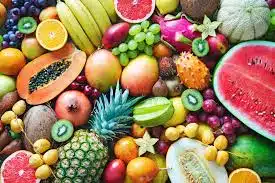
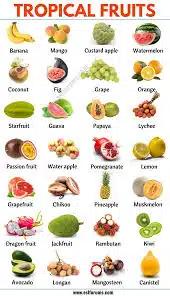
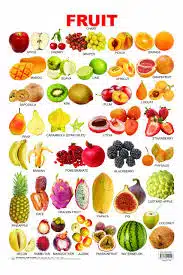
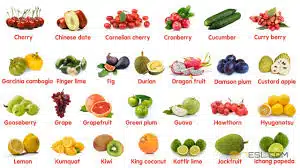
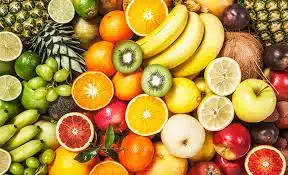
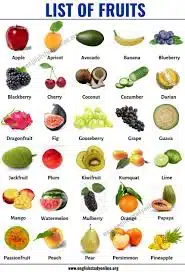
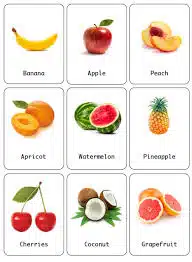
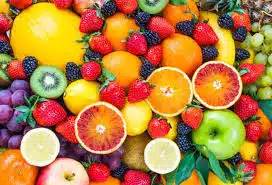
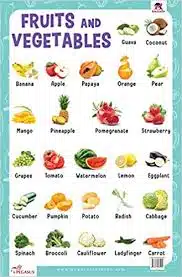
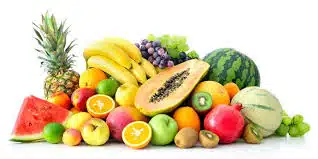
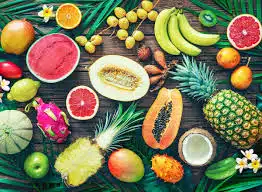
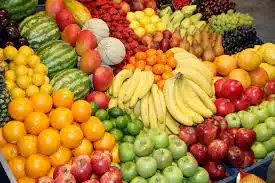
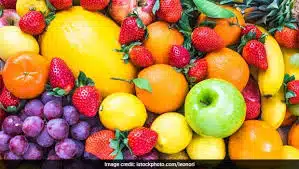
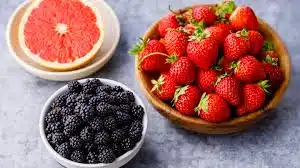
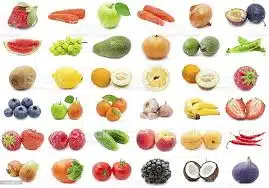
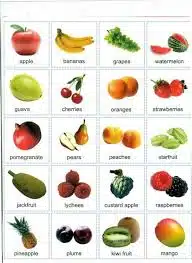
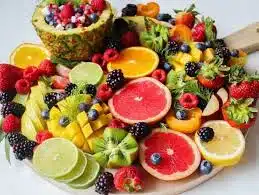
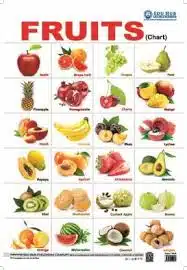
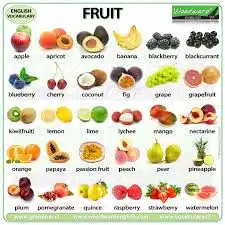
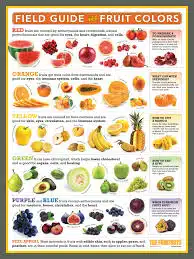

In [240]:
# Extracting the url of the fruits images to download them.

f_urls = []

for f3 in f_img:
    f_urls.append(f3.get_attribute('src'))

f_urls

2. Searching for 'Cars'

In [242]:
# Searching for 'cars'
src_tag3 = driver.find_element_by_xpath('//input[@class="og3lId"]')
src_tag3.send_keys('Cars')
time.sleep(2)

src_btn3 = driver.find_element_by_xpath('//button[@class="rCGXm"]')
src_btn3.click()

In [243]:
#Scrolling to the end of the page
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(10)

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR6MVXVrkmrxFD0DYB8SFlTH6H4ENUnQaG5SGkqCuMQaRqFSK7qBLLL5-d9zxZvz98NBJb3WUH-Fh84Dw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQSgcEr8VuTjj6nnwf5qMUeq7CGNVOj2VuWMHNHPtI3BJ1wehsbfszd--sph7tZHom7rqFEp2Vrm36u1g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR0MPKQ2Cw1qknc4q-4CZxKVxf4McvsOZfppiaVhzys93nov9rwP1cbd5h88P6sIURY59L0hp1QOu-u3A&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT2le7Vdf3D4i2XwbgTGDrt7lRY0PttCZ9fqEdQjppdPMkrK7nOqaSy61LW5pIVvTrb3kbD2FStR8qszg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS69mKP5ET-LHCjzgzJqUTJkDusqI6fjXCAHvi1q3K40GrUPqeGOt1pfp1fta5MInJnX2XA1qqIHMFGBw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQa8fLtodaq1R7rvkIF-8nAEpqqradHQn-vJvYD6nkDVfvyHniUefGMH1jx-tx2vhs-0TVngFhuhK8ucg&usqp=CAU',
 'https://en
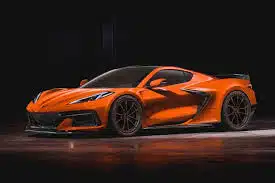
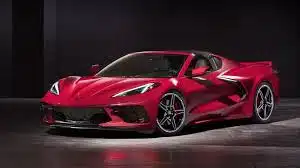
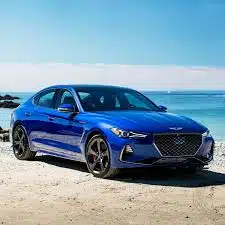
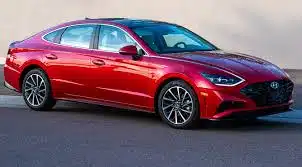
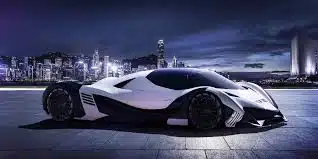
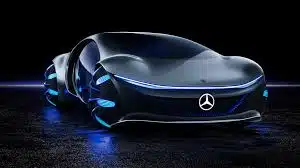
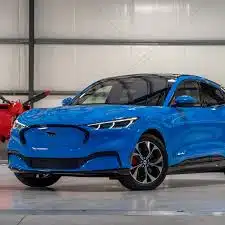
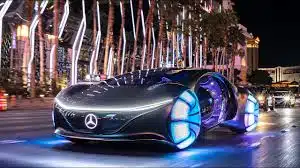
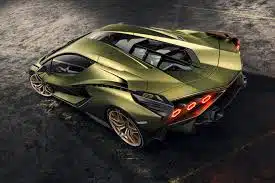
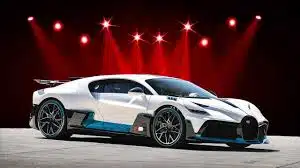
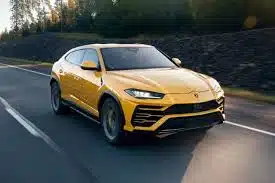
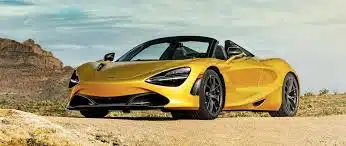
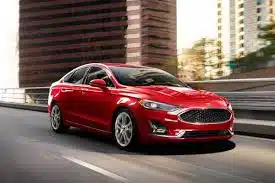
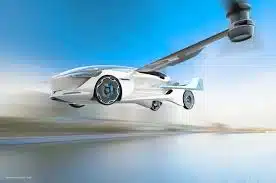
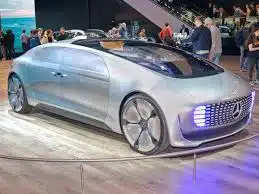
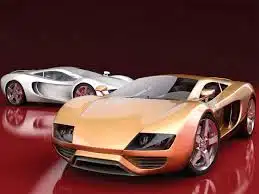
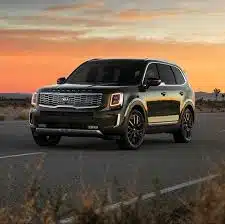
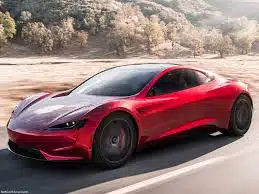
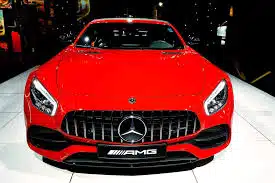
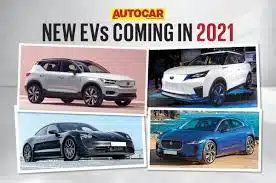

In [244]:
car_url = [] # Creating empty list

# Scraping the image URLs
car_tag = driver.find_elements_by_xpath('//img[@class="rg_i Q4LuWd"]') # Extracting the webelement
for c2 in car_tag:
    car_url.append(c2.get_attribute('src'))
    
car_url

3. Searching for 'Machine Learning'

In [245]:
# Searching for 'Machine Learning'
src_tag3 = driver.find_element_by_xpath('//input[@class="og3lId"]')
src_tag3.send_keys('Machine learning')
time.sleep(2)

src_btn3 = driver.find_element_by_xpath('//button[@class="rCGXm"]')
src_btn3.click()

In [246]:
#Scrolling to the end of the page
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(10)

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJ5ouLroBe3zxS_fTAC4RBkz7aPFUKGJd3YXx5woYFA4XsosLAu1tyQr8q8GCP_wT8z9EhP6VKcxqEzg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRH_z1WW8Iu58-3AcRhS4ub72VC50I5EnYu2U7eygzxpf3tOFrgpTcsSk1W1tVscwlpBEhN7bTxT6vzNA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR7TFaiaNTi0xzPI9udpGi7dYbdrJH5eB2spLkQEtAeKxZU9Yysfst79RNKT8ZLA93YAR7F4lgQBqz0Gw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSb7kcJdWtNSc9cGSb6-ifU4vJb7dX2FoCS4hjjxBGYjJZ3-kPXPmbKvC-J5Nhfg6CFQ9LZeNyT3RsQKA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTvONLVvnoa_uia0oiuhfQBgCWm3utLlRNZRXDkR39fCCUO7uIi0j5XwyXng4MJJqDuNSm24hEByAK7IQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTgG0YxlJcNydhSQIV4M1WQBsUEABmC591dplUC58tTaDOLIXHLFOihziGDx_8diRgJgL8PG2IyFIaNeA&usqp=CAU',
 'https://en
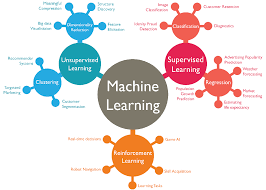
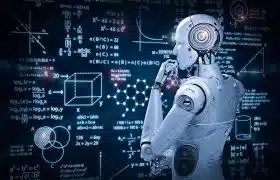
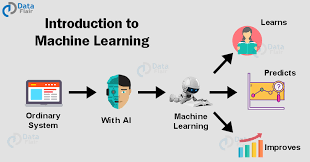
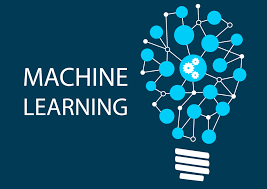
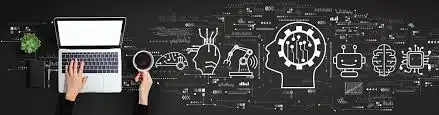
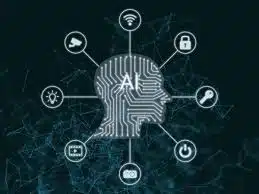
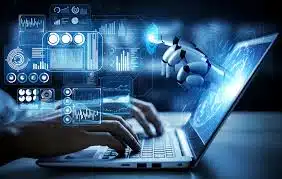
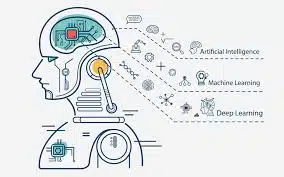
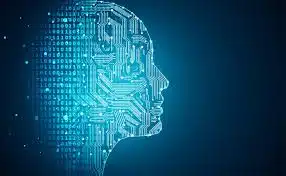
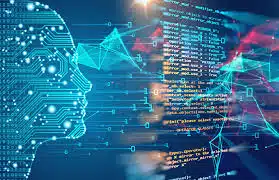
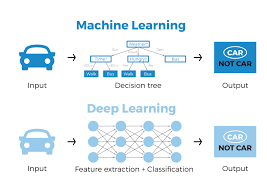
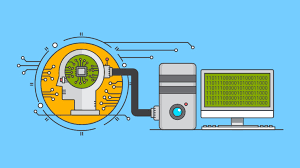
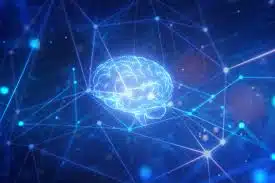
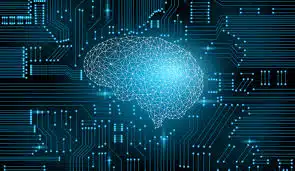
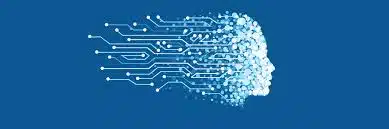
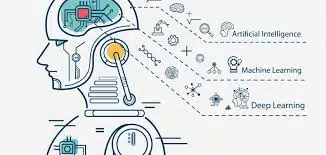
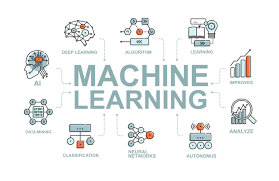
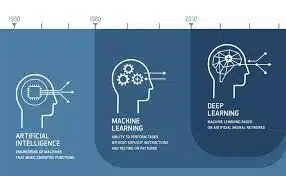
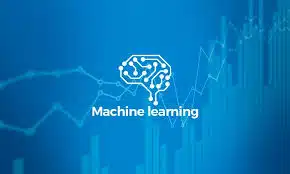
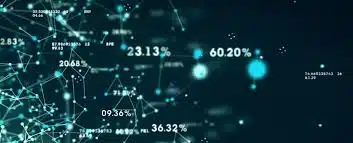

In [250]:
ml_url = [] # Creating empty list

# Scraping the image URLs
ml_tag = driver.find_elements_by_xpath('//img[@class="rg_i Q4LuWd"]') # Extracting the webelement
for m in ml_tag:
    ml_url.append(m.get_attribute('src'))
    
ml_url

-------------------------------------------------------------------------------------------------------------------------------

#### Q. No. 4 :- Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.


In [190]:
#Loading the web page.

url4 = 'https://www.flipkart.com'
driver.get(url4)

In [191]:
# Extracting the web element of the search bar and entering 'smartphone' in the search bar.

src_tag4 = driver.find_element_by_xpath('//input[@class="_3704LK"]')
src_tag4.send_keys('Google pixel 4A')

In [192]:
# Extracting the web element of the of the search button and clicking on it.

src_btn4 = driver.find_element_by_xpath('//button[@class="L0Z3Pu"]')
src_btn4.click()

In [195]:
price = []
prc_tag4 = driver.find_elements_by_xpath('//div[@class="_30jeq3 _1_WHN1"]')

for p4 in prc_tag4:
    if p4.text is None:
        price.append('--')
    else:
        price.append(p4.text)
price = price[:20]
price

['₹29,999',
 '₹39,999',
 '₹44,999',
 '₹80,000',
 '₹80,000',
 '₹71,000',
 '₹80,000',
 '₹82,000',
 '₹66,000',
 '₹70,000',
 '₹70,000',
 '₹57,000',
 '₹61,000',
 '₹44,999',
 '₹71,000',
 '₹39,999',
 '₹92,000',
 '₹71,000',
 '₹83,000',
 '₹83,000']

In [173]:
# Creating empty list
urls=[]
brand_name=[]
smartphone_name=[]
colour=[]
RAM =[]
ROM = []
primary_camera=[]
secondary_camera=[]
display_size=[]
display_resolution=[]
processor=[]
processor_core=[]
battery_capacity=[]
time.sleep(2)

In [182]:
# Extracting product URLs:

url_1 = driver.find_elements_by_xpath('//a[@class="_1fQZEK"]')
for u4 in url_1:
    urls.append(u4.get_attribute('href'))
    
urls = urls[:20]
urls

['https://www.flipkart.com/google-pixel-4a-just-black-128-gb/p/itm023b9677aa45d?pid=MOBFUSBNAZGY7HQU&lid=LSTMOBFUSBNAZGY7HQUWHTF0C&marketplace=FLIPKART&q=Google+pixel+4A&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=SEARCH&iid=9e0f8678-d1fb-477f-af15-38132ca0529b.MOBFUSBNAZGY7HQU.SEARCH&ppt=hp&ppn=homepage&ssid=myt9tjelog0000001627215005218&qH=fa679ee0fe6a210f',
 'https://www.flipkart.com/google-pixel-3a-clearly-white-64-gb/p/itmfgk4jfgstaack?pid=MOBFFGFPJSCEXMSG&lid=LSTMOBFFGFPJSCEXMSGODGRZE&marketplace=FLIPKART&q=Google+pixel+4A&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=SEARCH&iid=9e0f8678-d1fb-477f-af15-38132ca0529b.MOBFFGFPJSCEXMSG.SEARCH&ppt=hp&ppn=homepage&ssid=myt9tjelog0000001627215005218&qH=fa679ee0fe6a210f',
 'https://www.flipkart.com/google-pixel-3a-xl-clearly-white-64-gb/p/itmfgk4krqbuzh59?pid=MOBFFGFPTA6MCSRW&lid=LSTMOBFFGFPTA6MCSRWQQKLEZ&marketplace=FLIPKART&q=Google+pixel+4A&store=tyy%2F4io&srno=s_1_3&otracker=search&otracker1=search

In [186]:
for i4 in urls:
    driver.get(i4)
    time.sleep(2)
    
    #Extracting Smartphone names
    smt_nme = driver.find_elements_by_xpath('//span[@class="B_NuCI"]')
    for sm in smt_nme:
        if sm.text is None:
            smartphone_name.append('--')
        else:
            smartphone_name.append(sm.text)
            
smartphone_name

['Google Pixel 4a (Just Black, 128 GB)  (6 GB RAM)',
 'Google Pixel 3a (Clearly White, 64 GB)  (4 GB RAM)',
 'Google Pixel 3a XL (Clearly White, 64 GB)  (4 GB RAM)',
 'Google Pixel 3 (Clearly White, 64 GB)  (4 GB RAM)',
 'Google Pixel 3 (Not Pink, 128 GB)  (4 GB RAM)',
 'Google Pixel 3 (Clearly White, 128 GB)  (4 GB RAM)',
 'Google Pixel 3 (Just Black, 128 GB)  (4 GB RAM)',
 'Google Pixel 2 XL (Just Black, 128 GB)  (4 GB RAM)',
 'Google Pixel (Quite Black, 128 GB)  (4 GB RAM)',
 'Google Pixel 2 (Clearly White, 128 GB)  (4 GB RAM)',
 'Google Pixel 2 (Just Black, 128 GB)  (4 GB RAM)',
 'Google Pixel (Quite Black, 32 GB)  (4 GB RAM)',
 'Google Pixel 2 (Just Black, 64 GB)  (4 GB RAM)',
 'Google Pixel 3a XL (Just Black, 64 GB)  (4 GB RAM)',
 'Google Pixel 3 (Not Pink, 64 GB)  (4 GB RAM)',
 'Google Pixel 3a (Just Black, 64 GB)  (4 GB RAM)',
 'Google Pixel 3 XL (Not Pink, 128 GB)  (4 GB RAM)',
 'Google Pixel 3 (Just Black, 64 GB)  (4 GB RAM)',
 'Google Pixel 3 XL (Clearly White, 64 GB)  (4 GB

In [180]:
for i4 in urls:
    driver.get(i4)
    time.sleep(2)
    
    # Clicking on the Read More button to expand it.
    rd_mre = driver.find_element_by_xpath('//button[@class="_2KpZ6l _1FH0tX"]')
    rd_mre.click()
    time.sleep(2)
    
    # Scraping the RAM
    ram_tag4 = driver.find_elements_by_css_selector('#container > div > div._2c7YLP.UtUXW0._6t1WkM._3HqJxg > div._1YokD2._2GoDe3 > div._1YokD2._3Mn1Gg.col-8-12 > div._1YokD2._3Mn1Gg > div > div > div:nth-child(4) > div > div:nth-child(2) > div._1UhVsV > div:nth-child(4) > table > tbody > tr:nth-child(2) > td.URwL2w.col.col-9-12 > ul > li')
    for r1 in ram_tag4:
        try:
            RAM.append(r1.text)
        except NoSuchElementException:
            RAM.append('--')
    time.sleep(5)       
    # Scraping the ROM (Internal Storage)
    rom_tag4 = driver.find_elements_by_css_selector('#container > div > div._2c7YLP.UtUXW0._6t1WkM._3HqJxg > div._1YokD2._2GoDe3 > div._1YokD2._3Mn1Gg.col-8-12 > div._1YokD2._3Mn1Gg > div > div > div:nth-child(4) > div > div:nth-child(2) > div._1UhVsV > div:nth-child(4) > table > tbody > tr:nth-child(1) > td.URwL2w.col.col-9-12 > ul > li')
    for r2 in rom_tag4:
        try:
            ROM.append(r2.text)
        except NoSuchElementException:
            ROM.append('--')
    time.sleep(5)       
    # Scraping the Colour
    color_tag4 = driver.find_elements_by_css_selector('#container > div > div._2c7YLP.UtUXW0._6t1WkM._3HqJxg > div._1YokD2._2GoDe3 > div._1YokD2._3Mn1Gg.col-8-12 > div._1YokD2._3Mn1Gg > div > div > div:nth-child(4) > div > div:nth-child(2) > div._1UhVsV > div:nth-child(1) > table > tbody > tr:nth-child(4) > td.URwL2w.col.col-9-12 > ul > li')
    for c in color_tag4:
        try:
            colour.append(c.text)
        except NoSuchElementException:
            colour.append('--')
    time.sleep(5)
    # Scraping the Primary camera
    primary_tag4= driver.find_elements_by_css_selector('#container > div > div._2c7YLP.UtUXW0._6t1WkM._3HqJxg > div._1YokD2._2GoDe3 > div._1YokD2._3Mn1Gg.col-8-12 > div._1YokD2._3Mn1Gg > div > div > div:nth-child(4) > div > div:nth-child(2) > div._1UhVsV > div:nth-child(5) > table > tbody > tr:nth-child(2) > td.URwL2w.col.col-9-12 > ul > li')
    for p in primary_tag4:
        try:
            primary_camera.append(p.text)
        except NoSuchElementException:
            primary_camera.append('--')
    time.sleep(5)        
    # Scraping the Secondary camera
    second_tag4 = driver.find_elements_by_css_selector('#container > div > div._2c7YLP.UtUXW0._6t1WkM._3HqJxg > div._1YokD2._2GoDe3 > div._1YokD2._3Mn1Gg.col-8-12 > div._1YokD2._3Mn1Gg > div > div > div:nth-child(4) > div > div:nth-child(2) > div._1UhVsV > div:nth-child(5) > table > tbody > tr:nth-child(5) > td.URwL2w.col.col-9-12 > ul > li')
    for s in second_tag4:
        try:
            secondary_camera.append(s.text)
        except NoSuchElementException:
            secondary_camera.append('--')
    time.sleep(5)        
    # Scraping the display size
    display_tag4 = driver.find_elements_by_css_selector('#container > div > div._2c7YLP.UtUXW0._6t1WkM._3HqJxg > div._1YokD2._2GoDe3 > div._1YokD2._3Mn1Gg.col-8-12 > div._1YokD2._3Mn1Gg > div > div > div:nth-child(4) > div > div:nth-child(2) > div._1UhVsV > div:nth-child(2) > table > tbody > tr:nth-child(1) > td.URwL2w.col.col-9-12 > ul > li')
    for d in display_tag4:
        try:
            display_size.append(d.text)
        except NoSuchElementException:
            display_size.append('--')
    time.sleep(5)        
    # Scraping the display resolution
    resolution_tag4 = driver.find_elements_by_css_selector('#container > div > div._2c7YLP.UtUXW0._6t1WkM._3HqJxg > div._1YokD2._2GoDe3 > div._1YokD2._3Mn1Gg.col-8-12 > div._1YokD2._3Mn1Gg > div > div > div:nth-child(4) > div > div:nth-child(2) > div._1UhVsV > div:nth-child(2) > table > tbody > tr:nth-child(2) > td.URwL2w.col.col-9-12 > ul > li')
    for r in resolution_tag4:
        try:
            display_resolution.append(r.text)
        except NoSuchElementException:
            display_resolution.append('--')
    time.sleep(5)        
    # Scraping the processor
    processor_tag4 = driver.find_elements_by_css_selector('#container > div > div._2c7YLP.UtUXW0._6t1WkM._3HqJxg > div._1YokD2._2GoDe3 > div._1YokD2._3Mn1Gg.col-8-12 > div._1YokD2._3Mn1Gg > div > div > div:nth-child(4) > div > div:nth-child(2) > div._1UhVsV > div:nth-child(3) > table > tbody > tr:nth-child(2) > td.URwL2w.col.col-9-12 > ul > li')
    for p4 in processor_tag4:
        try:
            processor.append(p4.text)
        except NoSuchElementException:
            processor.append('--')
    time.sleep(5)        
    # Scraping the processor core
    core_tag4 = driver.find_elements_by_css_selector('#container > div > div._2c7YLP.UtUXW0._6t1WkM._3HqJxg > div._1YokD2._2GoDe3 > div._1YokD2._3Mn1Gg.col-8-12 > div._1YokD2._3Mn1Gg > div > div > div:nth-child(4) > div > div:nth-child(2) > div._1UhVsV > div:nth-child(3) > table > tbody > tr:nth-child(3) > td.URwL2w.col.col-9-12 > ul > li')
    for c4 in core_tag4:
        try:
            processor_core.append(c4.text)
        except NoSuchElementException:
            processor_core.append('--')
    time.sleep(5)        
    # Scraping the battery capacity
    battery_tag4 = driver.find_elements_by_css_selector('#container > div > div._2c7YLP.UtUXW0._6t1WkM._3HqJxg > div._1YokD2._2GoDe3 > div._1YokD2._3Mn1Gg.col-8-12 > div._1YokD2._3Mn1Gg > div > div > div:nth-child(4) > div > div:nth-child(2) > div._1UhVsV > div:nth-child(8) > table > tbody > tr > td.URwL2w.col.col-9-12 > ul > li')
    for b4 in battery_tag4:
        try:
            battery_capacity.append(b4.text)
        except NoSuchElementException:
            battery_capacity.append('--')
    time.sleep(5)           

In [196]:
print(len(price),len(smartphone_name),len(RAM),len(ROM),len(colour),len(primary_camera),len(secondary_camera),len(display_size),len(display_resolution),len(processor),len(processor_core),len(battery_capacity))

20 20 20 20 20 20 20 20 20 20 20 20


In [197]:
# Making dataframe

mobile4 = pd.DataFrame({'Smartphone Name':smartphone_name,
                        'Color':colour,
                        'RAM': RAM, 'ROM':ROM,
                        'Primary Camera':primary_camera,
                        'Secondary Camera':secondary_camera,
                        'Display Resolution':display_resolution,
                        'Display Size':display_size,
                        'Processor Type':processor, 'Core of Processor':processor_core,
                        'Price':price, })

mobile4

,Smartphone Name,Color,RAM,ROM,Primary Camera,Secondary Camera,Display Resolution,Display Size,Processor Type,Core of Processor,Price
0,"Google Pixel 4a (Just Black, 128 GB) (6 GB RAM)",Clearly White,4 GB,64 GB,12.2MP Rear Camera,8MP Front Camera,2160 x 1080 pixels,15.24 cm (6 inch),Qualcomm Snapdragon 670,Octa Core,"₹29,999"
1,"Google Pixel 3a (Clearly White, 64 GB) (4 GB ...",Clearly White,4 GB,64 GB,12.2MP Rear Camera,8MP + 8MP Dual Front Camera,2160 x 1080 pixels,13.97 cm (5.5 inch),Qualcomm Snapdragon 845 64-bit,Octa Core,"₹39,999"
2,"Google Pixel 3a XL (Clearly White, 64 GB) (4 ...",Not Pink,4 GB,128 GB,12.2MP Rear Camera,8MP + 8MP Dual Front Camera,2160 x 1080 pixels,13.97 cm (5.5 inch),Qualcomm Snapdragon 845 64-bit,Octa Core,"₹44,999"
3,"Google Pixel 3 (Clearly White, 64 GB) (4 GB RAM)",Clearly White,4 GB,128 GB,12.2MP Rear Camera,8MP + 8MP Dual Front Camera,2160 x 1080 pixels,13.97 cm (5.5 inch),Qualcomm Snapdragon 845 64-bit,Octa Core,"₹80,000"
4,"Google Pixel 3 (Not Pink, 128 GB) (4 GB RAM)",Just Black,4 GB,128 GB,12.2MP Rear Camera,8MP + 8MP Dual Front Camera,2160 x 1080 pixels,13.97 cm (5.5 inch),Qualcomm Snapdragon 845 64-bit,Octa Core,"₹80,000"
5,"Google Pixel 3 (Clearly White, 128 GB) (4 GB ...",Smartphones,4 GB,128 GB,12.2MP Rear Camera,8MP Front Camera,2880 x 1440 Pixels,15.24 cm (6 inch),Qualcomm Snapdragon 835 64-bit Octa Core,Octa Core,"₹71,000"
6,"Google Pixel 3 (Just Black, 128 GB) (4 GB RAM)",Clearly White,4 GB,128 GB,12.2MP Rear Camera,8MP Front Camera,1920 x 1080 Pixels,12.7 cm (5 inch),Qualcomm Snapdragon 835 64-bit Octa Core,Octa Core,"₹80,000"
7,"Google Pixel 2 XL (Just Black, 128 GB) (4 GB ...",Just Black,4 GB,128 GB,12.2MP Rear Camera,8MP Front Camera,1920 x 1080 Pixels,12.7 cm (5 inch),Qualcomm Snapdragon 835 64-bit Octa Core,Octa Core,"₹82,000"
8,"Google Pixel (Quite Black, 128 GB) (4 GB RAM)",Just Black,4 GB,64 GB,12.2MP Rear Camera,8MP Front Camera,1920 x 1080 Pixels,12.7 cm (5 inch),Qualcomm Snapdragon 835 64-bit Octa Core,Octa Core,"₹66,000"
9,"Google Pixel 2 (Clearly White, 128 GB) (4 GB ...",Just Black,4 GB,64 GB,12.2MP Rear Camera,8MP Front Camera,2160 x 1080 pixels,15.24 cm (6 inch),Qualcomm Snapdragon 670,Octa Core,"₹70,000"


-------------------------------------------------------------------------------------------------------------------------------

#### Q.No. 5:- Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.


In [3]:
# Loading the web-page of google maps.

url5 = 'https://www.google.com/maps'

driver.get(url5)

In [4]:
# Extracting the webelement of the location search bar and entering the name of city 'Bangalore'.

src_loc_tag5 = driver.find_element_by_xpath('//input[@class="tactile-searchbox-input"]')
src_loc_tag5.send_keys('Bangalore')

In [5]:
# Clicking on the search button after extracting the web element.

src_btn5 = driver.find_element_by_xpath('//button[@class="searchbox-searchbutton"]')

src_btn5.click()

In [8]:
# Finding the geospatial coordinates.

geo_coordinate = driver.find_element_by_xpath('//li[@class="nbpPqf-menu-x3Eknd"]')

cordinates = geo_coordinate.text

print('The latitude and longitude of Bangalore is', cordinates)

The latitude and longitude of Bangalore is 12.70502, 77.49965


------------------------------------------------------------------------------------------------------------------------------

#### Q. No. 6:- Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 – September 20) from trak.in.

In [9]:
#Loading the web-page.

url6 = 'https://trak.in/'

driver.get(url6)

In [10]:
# Extracting the web element and clicking on the Funding Deals tab.

funding_tag = driver.find_element_by_xpath('//li[@class="menu-have-icon menu-icon-type-fontawesome menu-item menu-item-type-post_type menu-item-object-page better-anim-fade menu-item-51510"]')

funding_tag.click()

In [17]:
# Extracting the web-element of Dates.

funding_dates = driver.find_elements_by_xpath('//td[@class="column-2"]')

# Extracting the text from the web element.

f_dates = []

for f in funding_dates:
    f_dates.append(f.text)
    
f_dates

['01/04/2021',
 '05/04/2021',
 '14/04/2021',
 '07/04/2021',
 '14/04/2021',
 '04/03/2021',
 '31/03/2021',
 '30/03/2021',
 '30/03/2021',
 '23/03/2021',
 '25/03/2021',
 '26/03/2021',
 '11/02/2021',
 '22/02/2021',
 '19/02/2021',
 '17/02/2021',
 '15/02/2021',
 '12/02/2021',
 '12/02/2021',
 '09/02/2021',
 '09/02/2021',
 '15/01/2021',
 '28/01/2021',
 '19/01/2021',
 '19/01/2021',
 '18/01/2021',
 '18/01/2021',
 '11/01/2021',
 '13/01/2021',
 '15/12/2020',
 '21/12/2020',
 '15/12/2020',
 '22/12/2020',
 '15/12/2020',
 '18/12/2020',
 '30/11/2020',
 '30/11/2020',
 '29/11/2020',
 '27/11/2020',
 '25/11/2020',
 '25/11/2020',
 '25/11/2020',
 '24/11/2020',
 '30/11/2020',
 '23/11/2020',
 '28/10/2020',
 '28/10/2020',
 '28/10/2020',
 '27/10/2020',
 '27/10/2020',
 '27/10/2020',
 '27/10/2020',
 '15/10/2020',
 '26/10/2020',
 '28/10/2020',
 '21/10/2020',
 '04/08/2020',
 '08/09/2020',
 '12/09/2020',
 '09/09/2020',
 '02/09/2020',
 '09/09/2020',
 '07/09/2020',
 '07/09/2020',
 '31/08/2020',
 '31/08/2020',
 '03/09/20

In [21]:
dates = f_dates[57:90]

dates

['08/09/2020',
 '12/09/2020',
 '09/09/2020',
 '02/09/2020',
 '09/09/2020',
 '07/09/2020',
 '07/09/2020',
 '31/08/2020',
 '31/08/2020',
 '03/09/2020',
 '08/09/2020',
 '15/08/2020',
 '13/08/2020',
 '13/08/2020',
 '04/08/2020',
 '11/08/2020',
 '12/08/2020',
 '14/08/2020',
 '10/08/2020',
 '07/08/2020',
 '13/08/2020',
 '03/08/2020',
 '04/08/2020',
 '15/07/2020',
 '16/07/2020',
 '16/07/2020',
 '14/07/2020',
 '13/07/2020',
 '09/07/2020',
 '10/07/2020',
 '15/07/2020',
 '14/07/2020',
 '13/07/2020']

In [22]:
len(dates)

33

In [23]:
# Extracting the webelement of the startup name.

startup_nme = driver.find_elements_by_xpath('//td[@class="column-3"]')

# Extracting the text from the web element.

startups = []

for s in startup_nme:
    startups.append(s.text)
    
# Using indexing to get the desired results

startups = startups[57:90]

startups

['Byju’s',
 'mCaffeine',
 'Qshala',
 'Winzo',
 'Hippo Video',
 'Melorra',
 '1mg',
 'mfine',
 'Apna',
 'Railofy',
 'Cell Propulsion',
 'Practo',
 'Medlife',
 'HungerBox',
 'Dunzo',
 'Terra.do',
 'Classplus',
 'Niyo',
 'ZestMoney',
 'FreshToHome',
 'Eduvanz',
 'CrowdPouch',
 'DrinkPrime',
 'Flipkart',
 'Vedantu',
 'Crio',
 'goDutch',
 'Mystifly',
 'JetSynthesys',
 'gigIndia',
 'PumPumPum',
 'FLYX',
 'Open Appliances Pvt. Ltd.']

In [24]:
len(startups)

33

In [25]:
# Extracting the web-elements of the Industry/Verticals.

verticals = driver.find_elements_by_xpath('//td[@class="column-4"]')

#Extracting text from the web-elements.

Industry = []
for ve in verticals:
    Industry.append(ve.text)
    
# Using indexing method to get the desired results.

Industry = Industry[57:90]

Industry

['EduTech',
 'Personal Care',
 'EduTech',
 'Online Gaming',
 'Video Customer Experience(CX) Platform',
 'E-commerce',
 'E-commerce',
 'HealthTech',
 'Human Resources',
 'Transportation',
 'Automobile',
 'HealthTech',
 'E-commerce',
 'FoodTech',
 'Hyper-local Logistics',
 'EduTech',
 'EduTech',
 'FinTech',
 'FinTech',
 'E-commerce',
 'FinTech',
 'FinTech',
 'Water Purification',
 'E-commerce',
 'EduTech',
 'EduTech',
 'FinTech',
 'Airfare Marketplace',
 'Gaming and Entertainment',
 'Marketplace',
 'Automotive Rental',
 'OTT Player',
 'Information Technology']

In [26]:
len(Industry)

33

In [27]:
# Extracting the web-elements of the sub-verticals.

sb_vert = driver.find_elements_by_xpath('//td[@class="column-5"]')


#Extracting the texts from the web-elements 

sub_verticals = []

for sb in sb_vert:
    sub_verticals.append(sb.text)
    
# Using Indexing method to get the desired results.

sub_verticals = sub_verticals[57:90]
sub_verticals

['Online Tutoring',
 'Skincare & Haircare',
 'Online Curiosity Platform for Kids',
 'Online Gaming',
 'Video Customer Experience(CX) Platform',
 'Online Jewelry Store',
 'Online Pharmacy',
 'On-Demand Healthcare Services',
 'Recruitment Platform',
 'WL & RAC protection platform',
 'Electric Mobility Solutions',
 'Health care and Wellness',
 'Online Pharmacy',
 'Online Food Delivery Service',
 'Online Delivery Services',
 'Online Climate School, E-learning',
 'E-learning, Online Tutoring',
 'Financial Services',
 'Financial Services',
 'Food Delivery',
 'Financial Services',
 'Financial Services',
 'Water Purification',
 'E-commerce',
 'Online Tutoring',
 'Learning Platform for Developers',
 'Group Payments',
 'Ticketing, Airline Retailing, and Post-Ticketing Services',
 'Gaming and Entertainment',
 'Crowd Sourcing, Freelance',
 'Used Car-leasing platform',
 'Streaming Social Network',
 'Internet-of-Things Security Solutions']

In [28]:
len(sub_verticals)

33

In [29]:
# Extracting the web-elements of the City/Location.

loc = driver.find_elements_by_xpath('//td[@class="column-6"]')

# Extracting the text from the web-elements

city_name = []
for lc in loc:
    city_name.append(lc.text)
    
# Using Indexing method to get the desired results
city_name = city_name[57:90]
city_name

['Bangalore',
 'Mumbai',
 'Bangalore',
 'New Delhi',
 'Newark, Delaware, United States of Amercia',
 'Bangalore',
 'Gurgaon',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Stanford, California,',
 'Noida',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Singapore and Bangalore',
 'Pune',
 'Pune',
 'Gurgaon',
 'New York and Delhi',
 'Bangalore']

In [30]:
len(city_name)

33

In [31]:
# Extracting the web-elements of the INvestor's name

inves_nme = driver.find_elements_by_xpath('//td[@class="column-7"]')

# Extracting the texts

investor_name = []
for ins in inves_nme:
    investor_name.append(ins.text)
    
# Using Indexing method to get the desired results
investor_name = investor_name[57:90]

investor_name

['Silver Lake, Tiger Global, General Atlantic and Owl Ventures',
 'Amicus Capital Private Equity I LLP, Amicus Capital Partners India Fund I and RP-SG Venture Fund 1',
 'Rainmatter Capital',
 'Kalaari Capital Partners, IndigoEdge Management Consultancy',
 'Alpha Wave Incubation, Exfinity Venture Partners and existing backers.',
 'Shadow Holdings, Lightbox.',
 'Gaja Capital, Tata Capital, Partners Group',
 'Caretech Pte Inc',
 'Lightspeed India and Sequoia Capital India',
 'Chiratae Ventures',
 'growX Ventures and Micelio',
 'A1A Company',
 'Prasid Uno Family Trust and SC Credit Fund',
 'One97, Sabre Partners Trust, Pratithi Investment Trust, and Srihari Kumar',
 'Existing Backers',
 'Stanford Angels and Entrepreneurs (India), BEENEXT Emerging Asia, Rainmatter Capital',
 'Falcon Edge',
 'Niyo Solutions Inc.',
 'Primrose Hills Ventures',
 'Ascent Capital',
 'Sequoia India, Unitus',
 'Elina Investments Pvt. Ltd',
 'Sequoia Surge, ON Mauritius',
 'Walmart Inc',
 'Coatue Management',
 '021 

In [32]:
len(investor_name)

33

In [33]:
# Extracting the web-elements of the Investment type

inves_type = driver.find_elements_by_xpath('//td[@class="column-8"]')

# Extracting the texts

investment_type = []
for ty in inves_type:
    investment_type.append(ty.text)
    
#Using Indexing method to get the desired results

investment_type = investment_type[57:90]
investment_type

['Private Equity',
 'Series B',
 'Angel',
 'Series B',
 'Series A',
 'Debt Financing',
 'In Progress',
 'Series B',
 'Series A',
 'Seed',
 'pre-Series A',
 'Series F',
 '',
 'Series D1',
 'In Progress',
 'Seed',
 'In Progress',
 '',
 '',
 'Venture',
 'Series A',
 'Angel',
 'Pre-Series A',
 'M&A',
 'Series D',
 'pre-Series A',
 'Seed',
 'pre-Series B',
 'Venture-Series Unknown',
 'pre-Series A',
 'Seed',
 'pre-Seed',
 'Venture-Series Unknown']

In [34]:
len(investment_type)

33

In [35]:
# Extracting the web-elements of the Amount

amnt = driver.find_elements_by_xpath('//td[@class="column-9"]')

#Extracing the texts

amount_usd = []
for am in amnt:
    amount_usd.append(am.text)
    
# Using Indexing to get the desired result
amount_usd = amount_usd[57:90]
amount_usd

['500,000,000',
 '3,000,000',
 '370,000',
 '15,500,000',
 '4,500,000',
 'upto 8,900,000',
 '100,000,000',
 '5,400,000',
 '8,000,000',
 '950,000',
 'NA',
 '32,000,000',
 '23,000,000',
 '1,560,000',
 '30,000,000',
 '1,400,000',
 'upto 15,000,000',
 '6,000,000',
 '10,670,000',
 '16,200,000',
 '5,000,000',
 'NA',
 '2,880,000',
 '1,200,000,000',
 '100,000,000',
 '934,160',
 '1,700,000',
 '3,300,000',
 '400,000',
 '974,200',
 '292,800',
 '200,000',
 '500,000']

In [36]:
len(amount_usd)

33

In [37]:
# Making the dataframe

fundings = pd.DataFrame({})
fundings['Date DD/MM/YYYY'] = dates
fundings['Start Name '] = startups
fundings[' Industry '] = Industry
fundings['Sub-Verticals '] = sub_verticals
fundings[' Location/City '] = city_name
fundings[" Investor's Name "] = investor_name
fundings[' Investment Type '] = investment_type
fundings[' Amount (In USD)'] = amount_usd

fundings

,Date DD/MM/YYYY,Start Name,Industry,Sub-Verticals,Location/City,Investor's Name,Investment Type,Amount (In USD)
0,08/09/2020,Byju’s,EduTech,Online Tutoring,Bangalore,"Silver Lake, Tiger Global, General Atlantic an...",Private Equity,"500,000,000"
1,12/09/2020,mCaffeine,Personal Care,Skincare & Haircare,Mumbai,"Amicus Capital Private Equity I LLP, Amicus Ca...",Series B,"3,000,000"
2,09/09/2020,Qshala,EduTech,Online Curiosity Platform for Kids,Bangalore,Rainmatter Capital,Angel,"370,000"
3,02/09/2020,Winzo,Online Gaming,Online Gaming,New Delhi,"Kalaari Capital Partners, IndigoEdge Managemen...",Series B,"15,500,000"
4,09/09/2020,Hippo Video,Video Customer Experience(CX) Platform,Video Customer Experience(CX) Platform,"Newark, Delaware, United States of Amercia","Alpha Wave Incubation, Exfinity Venture Partne...",Series A,"4,500,000"
5,07/09/2020,Melorra,E-commerce,Online Jewelry Store,Bangalore,"Shadow Holdings, Lightbox.",Debt Financing,"upto 8,900,000"
6,07/09/2020,1mg,E-commerce,Online Pharmacy,Gurgaon,"Gaja Capital, Tata Capital, Partners Group",In Progress,"100,000,000"
7,31/08/2020,mfine,HealthTech,On-Demand Healthcare Services,Bangalore,Caretech Pte Inc,Series B,"5,400,000"
8,31/08/2020,Apna,Human Resources,Recruitment Platform,Bangalore,Lightspeed India and Sequoia Capital India,Series A,"8,000,000"
9,03/09/2020,Railofy,Transportation,WL & RAC protection platform,Mumbai,Chiratae Ventures,Seed,"950,000"


-------------------------------------------------------------------------------------------------------------------------------

#### Q. No. 7:- Write a program to scrap all the available details of best gaming laptops from digit.in.

In [54]:
url7 = 'https://www.digit.in/'
driver.get(url7)

In [55]:
# Extracting the web-element and clicking on the Laptop tab.

laptop_tab = driver.find_element_by_xpath('/html/body/div[1]/div[2]/div[4]/ul/li[3]/a')

laptop_tab.click()

In [56]:
# Extracting the web-element and clicking on the 'Best Gaming Laptops in India'.

gaming_laptop = driver.find_element_by_xpath('/html/body/div[6]/div/div[2]/div[2]/ul/li[10]/a')

gaming_laptop.click()

In [57]:
# Extracting the web-elements of the names of laptops.

name_laptop = driver.find_elements_by_xpath('//div[@class="TopNumbeHeading active sticky-footer"]')

# Extracting the texts 
names_laptop = []
for n in name_laptop:
    names_laptop.append(n.text.replace('\n',''))
    
names_laptop

['1.ALIENWARE AREA 51M R2',
 '2.ALIENWARE M15 R3',
 '3.ASUS ROG STRIX SCAR 15',
 '4.ASUS ROG ZEPHYRUS G14',
 '5.LENOVO LEGION 5I',
 '6.ASUS ROG ZEPHYRUS DUO 15',
 '7.ACER ASPIRE 7 GAMING']

In [60]:
# Extracting the web-element of the specifications of laptop.

specs_tag = driver.find_elements_by_xpath('//div[@class="value"]')

#Extracting the texts
specs_laptop = []
for s in specs_tag:
    specs_laptop.append(s.text)
    
specs_laptop

['WINDOWS 10 HOME',
 '17.3" (1920 X 1080)',
 '10TH GENERATION INTEL® CORE™ I7-10700 | 2.90 GHZ',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10 HOME',
 '15.6" (3840 X 2160)',
 '10TH GENERATION INTEL® CORE™ I9-10980HK | NA',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10 HOME',
 '15.6" (1920 X 1080)',
 'AMD RYZEN™ 9 5900HX | 3.3 GHZ',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10 HOME',
 '14" (1920 X 1080)',
 'AMD 3RD GENERATION RYZEN 9 | 3.3 GHZ',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10 PRO',
 '15.6" (1920 X 1080)',
 '10TH GENERATION INTEL® CORE™ I5-10300H | 2.50 GHZ',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10',
 '15.6" (3840 X 1100)',
 'INTEL CORE I7 10TH GEN 10875H | NA',
 '512 GB SSD/4 GBGB DDR4',
 'WINDOWS 10 HOME',
 '15.6" (1920 X 1080)',
 'AMD RYZEN™ 5-5500U HEXA-CORE | NA',
 '512 GB SSD/8 GBGB DDR4']

In [77]:
len (specs_laptop)

28

In [70]:
# Extracting the OS

os_laptop = specs_laptop[::4]
os_laptop

['WINDOWS 10 HOME',
 'WINDOWS 10 HOME',
 'WINDOWS 10 HOME',
 'WINDOWS 10 HOME',
 'WINDOWS 10 PRO',
 'WINDOWS 10',
 'WINDOWS 10 HOME']

In [76]:
# Extracting the display

display_laptop = specs_laptop[1:27:4]
display_laptop

['17.3" (1920 X 1080)',
 '15.6" (3840 X 2160)',
 '15.6" (1920 X 1080)',
 '14" (1920 X 1080)',
 '15.6" (1920 X 1080)',
 '15.6" (3840 X 1100)',
 '15.6" (1920 X 1080)']

In [78]:
# Extracting the Processor

processor_laptop = specs_laptop[2:28:4]
processor_laptop

['10TH GENERATION INTEL® CORE™ I7-10700 | 2.90 GHZ',
 '10TH GENERATION INTEL® CORE™ I9-10980HK | NA',
 'AMD RYZEN™ 9 5900HX | 3.3 GHZ',
 'AMD 3RD GENERATION RYZEN 9 | 3.3 GHZ',
 '10TH GENERATION INTEL® CORE™ I5-10300H | 2.50 GHZ',
 'INTEL CORE I7 10TH GEN 10875H | NA',
 'AMD RYZEN™ 5-5500U HEXA-CORE | NA']

In [79]:
# Extracting the Memory

memory_laptop = specs_laptop[3:29:4]
memory_laptop

['1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '512 GB SSD/4 GBGB DDR4',
 '512 GB SSD/8 GBGB DDR4']

In [81]:
# Making the dataframe

laptop_details = pd.DataFrame({})

laptop_details[' Laptop Name '] = names_laptop
laptop_details[' OS '] = os_laptop
laptop_details[' Display & Resolution '] = display_laptop
laptop_details[' Processor '] = processor_laptop
laptop_details[' Memory(SDD/RAM) & RAM Type '] = memory_laptop

laptop_details 

,Laptop Name,OS,Display & Resolution,Processor,Memory(SDD/RAM) & RAM Type
0,1.ALIENWARE AREA 51M R2,WINDOWS 10 HOME,"17.3"" (1920 X 1080)",10TH GENERATION INTEL® CORE™ I7-10700 | 2.90 GHZ,1 TB SSD/16 GBGB DDR4
1,2.ALIENWARE M15 R3,WINDOWS 10 HOME,"15.6"" (3840 X 2160)",10TH GENERATION INTEL® CORE™ I9-10980HK | NA,1 TB SSD/16 GBGB DDR4
2,3.ASUS ROG STRIX SCAR 15,WINDOWS 10 HOME,"15.6"" (1920 X 1080)",AMD RYZEN™ 9 5900HX | 3.3 GHZ,1 TB SSD/16 GBGB DDR4
3,4.ASUS ROG ZEPHYRUS G14,WINDOWS 10 HOME,"14"" (1920 X 1080)",AMD 3RD GENERATION RYZEN 9 | 3.3 GHZ,1 TB SSD/16 GBGB DDR4
4,5.LENOVO LEGION 5I,WINDOWS 10 PRO,"15.6"" (1920 X 1080)",10TH GENERATION INTEL® CORE™ I5-10300H | 2.50 GHZ,1 TB SSD/16 GBGB DDR4
5,6.ASUS ROG ZEPHYRUS DUO 15,WINDOWS 10,"15.6"" (3840 X 1100)",INTEL CORE I7 10TH GEN 10875H | NA,512 GB SSD/4 GBGB DDR4
6,7.ACER ASPIRE 7 GAMING,WINDOWS 10 HOME,"15.6"" (1920 X 1080)",AMD RYZEN™ 5-5500U HEXA-CORE | NA,512 GB SSD/8 GBGB DDR4


------------------------------------------------------------------------------------------------------------------------------

#### Q. No. 8 :- Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [5]:
# loding the webpage.

url8 = 'https://www.forbes.com/'

driver.get(url8)

In [6]:
# Extracting the web element and clicking on the navigation button.

navigation_tag8 = driver.find_element_by_xpath('//button[@class="icon--hamburger"]')

navigation_tag8.click()

In [7]:
# Extracting the web-element of the Billionaires section from the fobes webs and clicking on it.

fobes_list = driver.find_element_by_xpath('//a[@class="header__title"]')

fobes_list.click()

In [8]:
# Extracting the web-element and clicking to visit the web page of list of top billionaires.

billion_list = driver.find_element_by_xpath('//a[@class="ratio16x9"]')

billion_list.click()

In [10]:
# Extracting the web-element of the ranks

billion_rank = driver.find_elements_by_xpath('//div[@class="rank"]')

billion_rank

[<selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="d4b096dc-f5e8-4a17-82fe-da3866cada0f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="2400d59f-4e33-4e97-8dc9-a6b12e719e98")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="4cbeff6d-0cb9-4c86-bd36-c97a7af615f1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="d0ea18a4-14e7-4b7d-92e4-586af9dbfa36")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="5c626b25-4238-4770-a02e-0e7f90bf0161")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="a4cf0b6a-5a0b-4ed5-bfe3-6c804b5752f6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="783d4007-863d-40b0-9b21-b7

In [11]:
# Extracting the text from the web elements of the billionairs ranks.

ranks8 = []
for r8 in billion_rank:
    ranks8.append(r8.text)
    
ranks8

['1.',
 '2.',
 '3.',
 '4.',
 '5.',
 '6.',
 '7.',
 '8.',
 '9.',
 '10.',
 '11.',
 '12.',
 '13.',
 '14.',
 '15.',
 '16.',
 '17.',
 '18.',
 '19.',
 '20.',
 '21.',
 '22.',
 '23.',
 '24.',
 '25.',
 '26.',
 '27.',
 '27.',
 '29.',
 '30.',
 '31.',
 '32.',
 '33.',
 '34.',
 '35.',
 '36.',
 '37.',
 '38.',
 '39.',
 '40.',
 '41.',
 '41.',
 '43.',
 '44.',
 '45.',
 '46.',
 '47.',
 '48.',
 '48.',
 '50.',
 '51.',
 '52.',
 '53.',
 '53.',
 '55.',
 '56.',
 '57.',
 '58.',
 '59.',
 '60.',
 '61.',
 '62.',
 '62.',
 '64.',
 '65.',
 '66.',
 '66.',
 '68.',
 '69.',
 '70.',
 '71.',
 '71.',
 '73.',
 '74.',
 '75.',
 '75.',
 '77.',
 '78.',
 '79.',
 '80.',
 '81.',
 '82.',
 '83.',
 '84.',
 '85.',
 '86.',
 '87.',
 '88.',
 '89.',
 '89.',
 '89.',
 '92.',
 '93.',
 '94.',
 '95.',
 '96.',
 '96.',
 '98.',
 '99.',
 '100.',
 '100.',
 '102.',
 '103.',
 '104.',
 '105.',
 '105.',
 '107.',
 '107.',
 '109.',
 '110.',
 '111.',
 '112.',
 '113.',
 '114.',
 '115.',
 '116.',
 '117.',
 '118.',
 '119.',
 '119.',
 '121.',
 '121.',
 '121.',
 

In [15]:
len(ranks8)

200

In [12]:
# Extracting the web-element of the names.

billion_name = driver.find_elements_by_xpath('//div[@class="personName"]')

billion_name

[<selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="924c8056-dbac-4d26-8668-ac9baadc1fdb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="88f457c0-088b-4e72-9c5b-37b311fa7f1c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="4fb14e28-562e-41e2-99eb-45d3e22c60d5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="d2e782c4-392c-4b1f-a833-9c3827934bb0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="8879adac-d5b4-4f07-91c0-1ae47cb3b5f4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="cb38bf41-1241-476f-ad5b-1e81385f6c90")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="8a16355d-cfee-4422-b79a-43

In [13]:
# Extracting the texts from the web-element of the names.

b_names = []
for b8 in billion_name:
    b_names.append(b8.text)
    
b_names

['Jeff Bezos',
 'Elon Musk',
 'Bernard Arnault & family',
 'Bill Gates',
 'Mark Zuckerberg',
 'Warren Buffett',
 'Larry Ellison',
 'Larry Page',
 'Sergey Brin',
 'Mukesh Ambani',
 'Amancio Ortega',
 'Francoise Bettencourt Meyers & family',
 'Zhong Shanshan',
 'Steve Ballmer',
 'Ma Huateng',
 'Carlos Slim Helu & family',
 'Alice Walton',
 'Jim Walton',
 'Rob Walton',
 'Michael Bloomberg',
 'Colin Zheng Huang',
 'MacKenzie Scott',
 'Daniel Gilbert',
 'Gautam Adani & family',
 'Phil Knight & family',
 'Jack Ma',
 'Charles Koch',
 'Julia Koch & family',
 'Masayoshi Son',
 'Michael Dell',
 'Tadashi Yanai & family',
 'François Pinault & family',
 'David Thomson & family',
 'Beate Heister & Karl Albrecht Jr.',
 'Wang Wei',
 'Miriam Adelson',
 'He Xiangjian',
 'Dieter Schwarz',
 'Zhang Yiming',
 'Giovanni Ferrero',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'Li Ka-shing',
 'Qin Yinglin & family',
 'William Lei Ding',
 'Len Blavatnik',
 'Lee Shau Kee',
 'Jacqueline Mars',
 'John Mars',
 'Yang 

In [14]:
len(b_names)

200

In [16]:
# Extracting the web-element of the net worth.

net_worth = driver.find_elements_by_xpath('//div[@class="netWorth"]')
net_worth

[<selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="8e9e3a56-ff1c-46d5-a3e8-7c0da09a5587")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="2cc4dd64-8925-4691-ab48-bc2e13a484fd")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="bf692b00-ceee-4ba0-9e2b-79933ae10af5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="2aa542cd-9438-4fe4-956d-ced9a9c3655a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="997e2ed1-e93d-4c11-bb68-078a944bcdbd")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="ab9034c2-ab15-425a-95ca-31726eec5f63")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="526fcf69-97b3-4b60-bfe2-38

In [17]:
# Extracting the texts from the webelement of the net worth.

worth8 = []

for w8 in net_worth:
    worth8.append(w8.text)
    
worth8

['$177 B',
 '$151 B',
 '$150 B',
 '$124 B',
 '$97 B',
 '$96 B',
 '$93 B',
 '$91.5 B',
 '$89 B',
 '$84.5 B',
 '$77 B',
 '$73.6 B',
 '$68.9 B',
 '$68.7 B',
 '$65.8 B',
 '$62.8 B',
 '$61.8 B',
 '$60.2 B',
 '$59.5 B',
 '$59 B',
 '$55.3 B',
 '$53 B',
 '$51.9 B',
 '$50.5 B',
 '$49.9 B',
 '$48.4 B',
 '$46.4 B',
 '$46.4 B',
 '$45.4 B',
 '$45.1 B',
 '$44.1 B',
 '$42.3 B',
 '$41.8 B',
 '$39.2 B',
 '$39 B',
 '$38.2 B',
 '$37.7 B',
 '$36.9 B',
 '$35.6 B',
 '$35.1 B',
 '$34.5 B',
 '$34.5 B',
 '$33.7 B',
 '$33.5 B',
 '$33 B',
 '$32 B',
 '$31.7 B',
 '$31.3 B',
 '$31.3 B',
 '$29.6 B',
 '$29.1 B',
 '$28.4 B',
 '$27.7 B',
 '$27.7 B',
 '$27 B',
 '$26.9 B',
 '$26.4 B',
 '$26.3 B',
 '$26.2 B',
 '$26.1 B',
 '$25.9 B',
 '$25.8 B',
 '$25.8 B',
 '$25.5 B',
 '$25 B',
 '$24.9 B',
 '$24.9 B',
 '$24.6 B',
 '$24.4 B',
 '$23.6 B',
 '$23.5 B',
 '$23.5 B',
 '$23.4 B',
 '$23.3 B',
 '$23 B',
 '$23 B',
 '$22.4 B',
 '$22 B',
 '$21.9 B',
 '$21.7 B',
 '$21.6 B',
 '$21.5 B',
 '$21.4 B',
 '$21.3 B',
 '$20.9 B',
 '$20.5 B',
 '

In [18]:
len(worth8)

200

In [19]:
# Extracting the web-element of the age.

billion_age = driver.find_elements_by_xpath('//div[@class="age"]')
billion_age

[<selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="f5500c35-872f-42f1-81c0-d2617e825c80")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="48f050a0-8ad0-408f-9efc-e41f5ce80955")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="feed4ca3-5c2f-4e6e-9e1c-427a8ced69a3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="e6385515-cb32-4792-b079-9074d1024c3e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="c39cf534-7645-4265-b3b2-ec25a69fa82b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="f4852f37-a000-496e-9c42-94e9e01e07a0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="8c027fa5-bbd6-436c-8138-6b

In [20]:
# Extracting the text from the web elements of the age.

age8 = []
for a8 in billion_age:
    age8.append(a8.text)
    
age8

['57',
 '49',
 '72',
 '65',
 '36',
 '90',
 '76',
 '48',
 '47',
 '63',
 '85',
 '67',
 '66',
 '65',
 '49',
 '81',
 '71',
 '72',
 '76',
 '79',
 '41',
 '50',
 '59',
 '58',
 '83',
 '56',
 '85',
 '58',
 '63',
 '56',
 '72',
 '84',
 '63',
 'N/A',
 '50',
 '75',
 '78',
 '81',
 '37',
 '56',
 '72',
 '70',
 '92',
 '55',
 '49',
 '63',
 '93',
 '81',
 '85',
 '39',
 '55',
 '52',
 '62',
 '58',
 '60',
 '76',
 '65',
 '83',
 '64',
 '42',
 '67',
 '85',
 '75',
 '88',
 '76',
 '70',
 '65',
 '82',
 '67',
 '67',
 '90',
 '75',
 '49',
 '78',
 '51',
 '50',
 '47',
 '68',
 '74',
 '93',
 '54',
 '70',
 '53',
 '73',
 '59',
 '80',
 '59',
 '71',
 '81',
 '57',
 '60',
 '54',
 '92',
 '50',
 '57',
 '65',
 '62',
 '70',
 '67',
 '43',
 '57',
 '54',
 '81',
 '74',
 '55',
 '49',
 '36',
 '39',
 '91',
 '56',
 '91',
 '36',
 '68',
 '81',
 '85',
 '66',
 '66',
 '55',
 '64',
 '52',
 '45',
 '63',
 '62',
 '85',
 '55',
 '82',
 '34',
 '56',
 '57',
 '50',
 '51',
 '88',
 'N/A',
 '70',
 '56',
 '51',
 '66',
 '91',
 '52',
 '91',
 '39',
 '54',
 '63

In [21]:
len(age8)

200

In [22]:
# Extracting the web-elements of the citizenship.

billion_citizenship = driver.find_elements_by_xpath('//div[@class="countryOfCitizenship"]')
billion_citizenship

[<selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="7b2f2a59-542e-416c-a975-d7bbce495281")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="1e9c4e69-abb7-4ea7-8a8b-f05bba17a881")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="cb6e5b33-f387-4905-83f3-dab5bac2dbfa")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="28d83f66-19e2-4ef3-aa08-bc43f500e209")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="c8459048-6daf-4b26-8877-f674548207a8")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="97ebb5a4-1756-49a4-8046-b357b5388e36")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="02154d48-d956-46eb-aaec-51

In [23]:
# Extracting the texts from the web-elements of the citizenship.

citizenship8 = []
for c8 in billion_citizenship:
    citizenship8.append(c8.text)
    
citizenship8

['United States',
 'United States',
 'France',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'India',
 'Spain',
 'France',
 'China',
 'United States',
 'China',
 'Mexico',
 'United States',
 'United States',
 'United States',
 'United States',
 'China',
 'United States',
 'United States',
 'India',
 'United States',
 'China',
 'United States',
 'United States',
 'Japan',
 'United States',
 'Japan',
 'France',
 'Canada',
 'Germany',
 'China',
 'United States',
 'China',
 'Germany',
 'China',
 'Italy',
 'France',
 'France',
 'Hong Kong',
 'China',
 'China',
 'United States',
 'Hong Kong',
 'United States',
 'United States',
 'China',
 'Russia',
 'Hong Kong',
 'China',
 'Germany',
 'Russia',
 'Austria',
 'China',
 'Germany',
 'Russia',
 'China',
 'Mexico',
 'Italy',
 'Japan',
 'United States',
 'United States',
 'Russia',
 'Russia',
 'United States',
 'China',
 'Australia',
 'United States',
 'India',
 'China',
 'Chile',
 'Chi

In [24]:
len(citizenship8)

200

In [25]:
# Extracting the web-element of the source.

billion_source = driver.find_elements_by_xpath('//div[@class="source-column"]')
billion_source

[<selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="dfa75cb5-7f0b-4b0a-84bc-b938c43cc127")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="7f12c61d-bddd-4b00-aae3-92e091a911c8")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="92a961fe-4d9d-4c69-881c-30057066173f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="f9fd4d9c-0b9a-47ba-9e7b-64951f4b9a72")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="f6ca7f8c-2a3e-4c56-9eba-2e777a30fe72")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="07a4bfd0-60fd-490a-8fd2-2ad4463f78e5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="f0080f7a-b263-474d-b0a4-e2

In [26]:
# Extracting the texts from the webelements of the source.

source8 = []
for s8 in billion_source:
    source8.append(s8.text)
    
source8

['Amazon',
 'Tesla, SpaceX',
 'LVMH',
 'Microsoft',
 'Facebook',
 'Berkshire Hathaway',
 'software',
 'Google',
 'Google',
 'diversified',
 'Zara',
 "L'Oréal",
 'beverages, pharmaceuticals',
 'Microsoft',
 'internet media',
 'telecom',
 'Walmart',
 'Walmart',
 'Walmart',
 'Bloomberg LP',
 'e-commerce',
 'Amazon',
 'Quicken Loans',
 'infrastructure, commodities',
 'Nike',
 'e-commerce',
 'Koch Industries',
 'Koch Industries',
 'internet, telecom',
 'Dell computers',
 'fashion retail',
 'luxury goods',
 'media',
 'supermarkets',
 'package delivery',
 'casinos',
 'home appliances',
 'retail',
 'TikTok',
 'Nutella, chocolates',
 'Chanel',
 'Chanel',
 'diversified',
 'pig breeding',
 'online games',
 'music, chemicals',
 'real estate',
 'candy, pet food',
 'candy, pet food',
 'real estate',
 'steel, investments',
 'batteries',
 'real estate',
 'BMW, pharmaceuticals',
 'metals',
 'Red Bull',
 'soy sauce',
 'shipping',
 'steel, transport',
 'e-commerce',
 'mining',
 'eyeglasses',
 'sensors',


In [27]:
len(source8)

200

In [28]:
# Extracting the web element of the industry.

billion_industry = driver.find_elements_by_xpath('//div[@class="category"]')
billion_industry

[<selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="d9f38edb-833e-4591-b478-1c92de15a59c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="a89198b4-6f88-4aa7-b62c-c46fdc36d56a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="866ef3a7-5c77-4704-8fe9-3addf8d87e12")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="316152d2-8067-42e5-95dd-6b9e0b33203a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="64fdb38d-2fbe-48b1-8120-e8e64f15b881")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="3150fa1f-5553-4c1f-9c0d-839ca82dd95d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e04501b7f4aab7a316d4b1d9c4ea6b00", element="58278444-9b1b-4572-abb4-24

In [29]:
# Extracting texts from the webelements of industry.

industry8 = []
for i8 in billion_industry:
    industry8.append(i8.text)
    
industry8

['Technology',
 'Automotive',
 'Fashion & Retail',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Technology',
 'Technology',
 'Technology',
 'Diversified',
 'Fashion & Retail',
 'Fashion & Retail',
 'Food & Beverage',
 'Technology',
 'Technology',
 'Telecom',
 'Fashion & Retail',
 'Fashion & Retail',
 'Fashion & Retail',
 'Media & Entertainment',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Diversified',
 'Fashion & Retail',
 'Technology',
 'Diversified',
 'Diversified',
 'Telecom',
 'Technology',
 'Fashion & Retail',
 'Fashion & Retail',
 'Media & Entertainment',
 'Fashion & Retail',
 'Service',
 'Gambling & Casinos',
 'Manufacturing',
 'Fashion & Retail',
 'Technology',
 'Food & Beverage',
 'Fashion & Retail',
 'Fashion & Retail',
 'Diversified',
 'Food & Beverage',
 'Technology',
 'Diversified',
 'Real Estate',
 'Food & Beverage',
 'Food & Beverage',
 'Real Estate',
 'Metals & Mining',
 'Energy',
 'Real Estate',
 'Automotive',
 'Metals & Mining',
 'Food & Be

In [30]:
len(industry8)

200

In [31]:
# making dataframe of the extracted results.

billionaires = pd.DataFrame({})

billionaires[' Rank '] = ranks8
billionaires[' Name '] = b_names
billionaires[' Net Worth '] = worth8
billionaires[' Age '] = age8
billionaires[' Citizenship '] = citizenship8
billionaires [' Source '] = source8
billionaires[' Industry '] = industry8

billionaires

,Rank,Name,Net Worth,Age,Citizenship,Source,Industry
0,1.,Jeff Bezos,$177 B,57,United States,Amazon,Technology
1,2.,Elon Musk,$151 B,49,United States,"Tesla, SpaceX",Automotive
2,3.,Bernard Arnault & family,$150 B,72,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$124 B,65,United States,Microsoft,Technology
4,5.,Mark Zuckerberg,$97 B,36,United States,Facebook,Technology
...,...,...,...,...,...,...,...
195,195.,Harry Triguboff,$11.2 B,88,Australia,real estate,Real Estate
196,197.,Leonid Fedun & family,$11.1 B,65,Russia,oil,Energy
197,197.,Eyal Ofer,$11.1 B,70,Israel,"real estate, shipping",Diversified
198,197.,Evan Spiegel,$11.1 B,30,United States,Snapchat,Technology


-------------------------------------------------------------------------------------------------------------------------------

#### Q.No. 9:- Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.


In [97]:
#Loding the webpage

url9 = 'https://www.youtube.com/watch?v=Qmw9KE4MamU'

driver.get(url9)

In [98]:
# Extracting the web-element of the comments
comment_tag = driver.find_elements_by_xpath('//*[@id="content-text"]')
time.sleep(20)

# Extracting the texts
comments = []
for c in comment_tag:
    comments.append(c.text)
    
comments

['मोदी जी के भाषण के बाद खुद योगी जी कन्फ्यूज हैं कि इतना सारा काम मैंने कब करवाया 😂😂',
 'रवीश सर आपको धन्यवाद 🙏🏼🙏🏼🙏🏼\nउम्मीद करता हूं अंधभक्त को भी ये दिखा होगा 🤩',
 'मै तो सच भी इतने confidence के साथ नहीं बोल पाता हू.... सचमूच लाजवाब है अपना प्रधानमंत्री 😭',
 'रवीश जी भगवान से प्रार्थना करता हूं की मेरी उम्र भी आपको लग जाएं जिस समय झुठ का चारो तरफ साम्राज्य है इसी बीच एक छोटा सा चमकता सितारा हमें देश में सच्चाई से रूबरू कराता है, धन्यवाद 🌹🌹',
 'अगर सीवर का उद्घाटन भी प्रधानमंत्री करेगे तो पार्षद क्या करेंगे 😀👌 salute Ravish ji',
 'Loved ur english today . U get my point.',
 'Mr Modi deserves an Oscar for his acting skill he is speaking all lies with so confidence wow man how he could do this.',
 '_ठेके पर रौनक_🔆\n _स्कूल पर ताले_🔐\n गजब तेरी सोच है...ऐ चाय वाले।___( बॉस T वाले) \n😂😂',
 'Holy Benaras is being polluted  by the Biggest flood of lies by liar in Chief.',
 'First of all PM not wearing mask breaking covid protocol.....after that he start living lambi lambi😃😃😃😃',
 'Surely, 

In [99]:
len(comments)

585

In [100]:
comments = comments[:500]
comments

['मोदी जी के भाषण के बाद खुद योगी जी कन्फ्यूज हैं कि इतना सारा काम मैंने कब करवाया 😂😂',
 'रवीश सर आपको धन्यवाद 🙏🏼🙏🏼🙏🏼\nउम्मीद करता हूं अंधभक्त को भी ये दिखा होगा 🤩',
 'मै तो सच भी इतने confidence के साथ नहीं बोल पाता हू.... सचमूच लाजवाब है अपना प्रधानमंत्री 😭',
 'रवीश जी भगवान से प्रार्थना करता हूं की मेरी उम्र भी आपको लग जाएं जिस समय झुठ का चारो तरफ साम्राज्य है इसी बीच एक छोटा सा चमकता सितारा हमें देश में सच्चाई से रूबरू कराता है, धन्यवाद 🌹🌹',
 'अगर सीवर का उद्घाटन भी प्रधानमंत्री करेगे तो पार्षद क्या करेंगे 😀👌 salute Ravish ji',
 'Loved ur english today . U get my point.',
 'Mr Modi deserves an Oscar for his acting skill he is speaking all lies with so confidence wow man how he could do this.',
 '_ठेके पर रौनक_🔆\n _स्कूल पर ताले_🔐\n गजब तेरी सोच है...ऐ चाय वाले।___( बॉस T वाले) \n😂😂',
 'Holy Benaras is being polluted  by the Biggest flood of lies by liar in Chief.',
 'First of all PM not wearing mask breaking covid protocol.....after that he start living lambi lambi😃😃😃😃',
 'Surely, 

In [102]:
# Extracting web element of the comment time.

cmt_time = driver.find_elements_by_xpath('//*[@id="header-author"]/yt-formatted-string/a')

# Extracting the text
time_comments = []
for ct in cmt_time:
    time_comments.append(ct.text)
    
time_comments

['3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '2 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago (edited)',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '2 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago (edited)',
 '3 days ago',
 '3 days ago',
 '3 days ago (edited)',
 '3 days ago',
 '3 days ago',
 '3 days ago (edited)',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago (edited)',
 '3 days ago',
 '3 days ago (edited)',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '2 days ago',
 '3 days ago',
 

In [103]:
len(time_comments)

585

In [104]:
time = time_comments[:500]
time

['3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '2 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago (edited)',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '2 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago (edited)',
 '3 days ago',
 '3 days ago',
 '3 days ago (edited)',
 '3 days ago',
 '3 days ago',
 '3 days ago (edited)',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago (edited)',
 '3 days ago',
 '3 days ago (edited)',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '2 days ago',
 '3 days ago',
 

In [107]:
# Extracting the web-element of the comment upvote.

upvote = driver.find_elements_by_xpath('//*[@id="vote-count-middle"]')

# Extracting the text
comment_upvote = []
for up in upvote:
    try:
        comment_upvote.append(up.text)
    except NoSuchElementException:
        comment_upvote.append('-')
    
comment_upvote

['83',
 '66',
 '18',
 '195',
 '25',
 '134',
 '217',
 '58',
 '14',
 '60',
 '56',
 '60',
 '65',
 '27',
 '5',
 '58',
 '34',
 '29',
 '28',
 '19',
 '146',
 '7',
 '31',
 '16',
 '19',
 '44',
 '24',
 '53',
 '23',
 '41',
 '28',
 '37',
 '56',
 '5',
 '3',
 '10',
 '18',
 '15',
 '36',
 '20',
 '66',
 '3',
 '34',
 '17',
 '18',
 '42',
 '26',
 '10',
 '27',
 '30',
 '6',
 '7',
 '3',
 '4',
 '3',
 '71',
 '9',
 '4',
 '4',
 '2',
 '11',
 '1',
 '2',
 '3',
 '1',
 '7',
 '2',
 '',
 '1',
 '3',
 '3',
 '1',
 '2',
 '1',
 '9',
 '18',
 '1',
 '3',
 '',
 '6',
 '4',
 '2',
 '',
 '1',
 '1',
 '3',
 '1',
 '',
 '',
 '',
 '3',
 '7',
 '',
 '',
 '',
 '3',
 '',
 '',
 '3',
 '1',
 '27',
 '1',
 '',
 '3',
 '2',
 '3',
 '1',
 '',
 '',
 '1',
 '20',
 '',
 '1',
 '4',
 '',
 '29',
 '',
 '',
 '',
 '15',
 '2',
 '',
 '',
 '',
 '4',
 '',
 '',
 '',
 '',
 '12',
 '1',
 '1',
 '',
 '1',
 '9',
 '',
 '',
 '',
 '',
 '4',
 '',
 '',
 '',
 '1',
 '13',
 '',
 '1',
 '',
 '',
 '19',
 '',
 '1',
 '1',
 '1',
 '11',
 '1',
 '',
 '',
 '35',
 '1',
 '',
 '1',
 '9',
 '

In [108]:
len(comment_upvote)

585

In [109]:
upvote = comment_upvote[:500]
upvote

['83',
 '66',
 '18',
 '195',
 '25',
 '134',
 '217',
 '58',
 '14',
 '60',
 '56',
 '60',
 '65',
 '27',
 '5',
 '58',
 '34',
 '29',
 '28',
 '19',
 '146',
 '7',
 '31',
 '16',
 '19',
 '44',
 '24',
 '53',
 '23',
 '41',
 '28',
 '37',
 '56',
 '5',
 '3',
 '10',
 '18',
 '15',
 '36',
 '20',
 '66',
 '3',
 '34',
 '17',
 '18',
 '42',
 '26',
 '10',
 '27',
 '30',
 '6',
 '7',
 '3',
 '4',
 '3',
 '71',
 '9',
 '4',
 '4',
 '2',
 '11',
 '1',
 '2',
 '3',
 '1',
 '7',
 '2',
 '',
 '1',
 '3',
 '3',
 '1',
 '2',
 '1',
 '9',
 '18',
 '1',
 '3',
 '',
 '6',
 '4',
 '2',
 '',
 '1',
 '1',
 '3',
 '1',
 '',
 '',
 '',
 '3',
 '7',
 '',
 '',
 '',
 '3',
 '',
 '',
 '3',
 '1',
 '27',
 '1',
 '',
 '3',
 '2',
 '3',
 '1',
 '',
 '',
 '1',
 '20',
 '',
 '1',
 '4',
 '',
 '29',
 '',
 '',
 '',
 '15',
 '2',
 '',
 '',
 '',
 '4',
 '',
 '',
 '',
 '',
 '12',
 '1',
 '1',
 '',
 '1',
 '9',
 '',
 '',
 '',
 '',
 '4',
 '',
 '',
 '',
 '1',
 '13',
 '',
 '1',
 '',
 '',
 '19',
 '',
 '1',
 '1',
 '1',
 '11',
 '1',
 '',
 '',
 '35',
 '1',
 '',
 '1',
 '9',
 '

In [110]:
# Making the dataframe
youtube = pd.DataFrame({})

youtube[' Comments '] = comments
youtube[' Comment Time '] = time
youtube[' Comment Upvote '] = upvote

youtube

,Comments,Comment Time,Comment Upvote
0,मोदी जी के भाषण के बाद खुद योगी जी कन्फ्यूज है...,3 days ago,83
1,रवीश सर आपको धन्यवाद 🙏🏼🙏🏼🙏🏼\nउम्मीद करता हूं अ...,3 days ago,66
2,मै तो सच भी इतने confidence के साथ नहीं बोल पा...,3 days ago,18
3,रवीश जी भगवान से प्रार्थना करता हूं की मेरी उम...,3 days ago,195
4,अगर सीवर का उद्घाटन भी प्रधानमंत्री करेगे तो प...,2 days ago,25
...,...,...,...
495,Ravishji corona ke Samay par jo mushkiliya ham...,2 days ago,
496,Sir...Ye sab to trailer hai modi aur Yogi ji k...,1 day ago,
497,up ki taraqqi ki list\n1) ladkiyon ko jab man ...,3 days ago,
498,दिल्ली में अरविन्दकेजरीवाल चालिस शौचालयों का न...,3 days ago,


-------------------------------------------------------------------------------------------------------------------------------

#### Q. No. 10 :- Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [28]:
# Loading the webpage.

url10 = 'https://www.hostelworld.com'
driver.get(url10)
time.sleep(2)

In [29]:
# Extracting the webelement of the location search bar and entering 'London'
src_tag10 = driver.find_element_by_xpath('//input[@class="search-input"]')
src_tag10.send_keys('London')
time.sleep(5)

In [30]:
# Extracting the webelement and clicking on the button 'Let's Go'
go_btn = driver.find_element_by_xpath('//button[@class="button primary large"]')
go_btn.click()
time.sleep(2)

In [31]:
# Extracting the web element of hostel name

hstl_nme = driver.find_elements_by_xpath('//h2[@class="title title-6"]//a')
time.sleep(5)

#Extracting the names of the hostel

name_hst = []
for n in hstl_nme:
    name_hst.append(n.text)
    
name_hst

["St Christopher's Village",
 'Generator London',
 'Safestay London Kensington Holland Park',
 'PubLove @ The Crown, Battersea',
 '247london Hostel and Private Rooms',
 'PubLove @ The Steam Engine, Waterloo',
 'The London Home Hostel',
 'The Dictionary Hostel',
 "Wombat's The City Hostel London",
 'Safestay London Elephant & Castle',
 'PubLove @ The Green Man, Paddington',
 'Astor Museum Inn',
 'PubLove @ The White Ferry, Victoria',
 'Prime Backpackers Angel',
 'Atlas Hostels',
 'No.8 Willesden Hostel London',
 'YHA London St Pancras',
 'SoHostel',
 'The Walrus Hostel',
 'Keystone House Kings Cross',
 'Clink261',
 'Burlington Residence',
 'London Waterloo Hostel',
 'Jaeger Acton Hostel',
 'Astor Hyde Park',
 'Abercorn House',
 "St Christopher's Oasis-Female Only",
 'Astor Kensington',
 'New Cross Inn Hostel',
 'Mapesbury Hostel']

In [32]:
len(name_hst)

30

In [33]:
# Extracting the web element of distance from city center

dist_cc = driver.find_elements_by_xpath('//span[@class="description"]')
time.sleep(5)

# Scraping the distance of the hostel from the city center
distance_cc = []
for d in dist_cc:
    distance_cc.append(d.text)
    
distance_cc

['Hostel - 1.8km from city centre',
 'Hostel - 3km from city centre',
 'Hostel - 5.9km from city centre',
 'Hostel - 4.7km from city centre',
 'Hostel - 8.2km from city centre',
 'Hostel - 0.5km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 4.1km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 1.7km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 2.2km from city centre',
 'Hostel - 2.4km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 10km from city centre',
 'Hostel - 3.3km from city centre',
 'Hostel - 2km from city centre',
 'Hostel - 0.2km from city centre',
 'Hostel - 3.5km from city centre',
 'Hostel - 3.2km from city centre',
 'Hostel - 7.1km from city centre',
 'Hostel - 0.7km from city centre',
 'Hostel - 10.4km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 7.3km from city centre',
 'Hostel - 1.8km from city centre',
 'Hostel - 4.9km from city centr

In [34]:
len (distance_cc)

30

In [35]:
# Extracting the web element of the ratings:

rtngs = driver.find_elements_by_xpath('//div[@class="rating rating-summary-container big"]//div//div')
time.sleep(5)
# Scraping the ratings of the hostels

rts = []
for r in rtngs:
    if r.text is None:
        rts.append('--')
    else:
        rts.append(r.text)

        
#Scraping Overall ratings and number of total reviews

overall_ratings = []
t_reviews = []

for rt in range(0,len(rts)):
    if rt%2:
        t_reviews.append(rts[rt])
    else:
        overall_ratings.append(rts[rt])

In [36]:
overall_ratings

['Fabulous',
 'Very Good',
 'Superb',
 'Good',
 'No Rating',
 'Fabulous',
 'Very Good',
 'NEW',
 'Superb',
 'Fabulous',
 'Good',
 'Superb',
 'Fabulous',
 'Superb',
 'Rating',
 'Fabulous',
 'Superb',
 'Fabulous',
 'Fabulous',
 'Superb',
 'Fabulous',
 'Superb',
 'Fabulous',
 'Superb',
 'Superb',
 'Very Good',
 'Fabulous',
 'Fabulous',
 'Very Good',
 'Rating']

In [37]:
len (overall_ratings)

30

In [38]:
t_reviews

['10820 Total Reviews',
 '6733 Total Reviews',
 '1074 Total Reviews',
 '207 Total Reviews',
 '443 Total Reviews',
 '186 Total Reviews',
 '248 Total Reviews',
 '0 Total Reviews',
 '13130 Total Reviews',
 '3947 Total Reviews',
 '391 Total Reviews',
 '8707 Total Reviews',
 '130 Total Reviews',
 '513 Total Reviews',
 '194 Total Reviews',
 '4563 Total Reviews',
 '2775 Total Reviews',
 '3952 Total Reviews',
 '3638 Total Reviews',
 '8109 Total Reviews',
 '3167 Total Reviews',
 '26 Total Reviews',
 '2400 Total Reviews',
 '879 Total Reviews',
 '11321 Total Reviews',
 '3654 Total Reviews',
 '593 Total Reviews',
 '6324 Total Reviews',
 '999 Total Reviews',
 '357 Total Reviews']

In [39]:
len (t_reviews)

30

In [40]:
# Extracting the web-element of the prices
prices_tag10 = driver.find_elements_by_xpath('//div[@class="price-col"]')

#Extracting the prices
prices = []
for pr in prices_tag10:
    prices.append(pr.text.replace('\n',''))

    
# Scraping the Privates and dorms prices
privates = []
dorms = []

for pd in range(0,len(prices)):
    if pd%2:
        dorms.append(prices[pd])
    else:
        privates.append(prices[pd])

In [41]:
dorms

['Dorms FromRs1510',
 'Dorms FromRs1948',
 'Dorms FromRs1476',
 'Dorms FromRs1538',
 'No Dorms Available',
 'Dorms FromRs1538',
 'Dorms FromRs1620',
 'No Dorms Available',
 'Dorms FromRs2047',
 'Dorms FromRs1015',
 'Dorms FromRs1538',
 'Dorms FromRs1845',
 'Dorms FromRs1538',
 'Dorms FromRs2426',
 'No Dorms Available',
 'Dorms FromRs866',
 'No Dorms Available',
 'Dorms FromRs2050',
 'Dorms FromRs1292',
 'No Dorms Available',
 'Dorms FromRs1261',
 'Dorms FromRs2091',
 'Dorms FromRs1338',
 'No Dorms Available',
 'Dorms FromRs1538',
 'Dorms FromRs1572',
 'Dorms FromRs1613',
 'Dorms FromRs1538',
 'Dorms FromRs1095',
 'No Dorms Available']

In [42]:
print(len(dorms),len(privates))

30 30


In [44]:
# Creating empty list

url_hostel = []
description_hostel = []
facility_hostel = []

time.sleep(2)

In [45]:
# Scraping the urls
url_h = driver.find_elements_by_xpath('//a[@class="view-button"]')

for u in url_h:
    url_hostel.append(u.get_attribute('href'))

url_hostel

['https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Village/London/502?from=2021-07-26&to=2021-07-29&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Generator-London/London/510?from=2021-07-26&to=2021-07-29&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Safestay-London-Kensington-Holland-Park/London/93920?from=2021-07-26&to=2021-07-29&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/PubLove-The-Crown-Battersea/London/60336?from=2021-07-26&to=2021-07-29&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/247london-Hostel-and-Private-Rooms/London/64523?from=2021-07-26&to=2021-07-29&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/PubLove-The-Steam-Engine-Waterloo/London/29389?from=2021-07-26&to=2021-07-29&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/The-London-Home-Hostel/London/80690?from=2021-07-26&to=2021-07-29&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/The-Dict

In [46]:
len (url_hostel)

30

In [47]:
for u in url_hostel:
    driver.get(u)
    
    #Scraping the hostel description
    desc = driver.find_elements_by_xpath('//div[@class="content collapse-content"]')
    for d in desc:
        description_hostel.append(d.text.replace('\n',''))
    time.sleep(10)
description_hostel = description_hostel[:30]
description_hostel

['COVID 19 Policy Update.In response to Coronavirus (COVID-19), additional safety and sanitation measures are currently in effect at this property, including social distancing and in-house disinfection. St Christopher’s Inns at The Village in London Bridge is the UK’s first capsule hostel. Its brand new rooms have been specially designed for our guests to get the best night sleep possible before they wake up in amongst one of London’s most vibrant areas. Voted as one of the best party hostels in the world, our multi-award winning hostel offers guests Japanese-style capsule beds with USB ports, cool mood lighting and curtains for privacy. We even have new private rooms with one having an awesome view of the Shard right outside!Step out the door and you’ll be just a short walk away from the London Eye, Tower Bridge and the oldest food market in the city, Borough Market. We’re also only a two minute walk from TWO tube stations so getting anywhere in London couldn’t be easier. Party into t

In [48]:
len (description_hostel)

30

In [49]:
for u in url_hostel:
    driver.get(u)
    
    #Scraping the facilities of the hostels
    facilities = driver.find_elements_by_xpath('//ul[@class="facility-sections"]')
    for f in facilities:
        facility_hostel.append(f.text.replace('\n',''))
facility_hostel

['FreeLinen Included Free City Maps Free WiFi Free Internet Access Free City TourGeneralSecurity Lockers Key Card Access Common Room Elevator Breakfast Not Included Air Conditioning Adaptors Book Exchange Hot Showers Dryer Outdoor Terrace Reading Light Hair Dryers For Hire Hair Dryers Iron / Ironing Board Microwave Washing Machine Towels Not Included Flexible NRR Follows Covid-19 sanitation guidanceServicesInternet access Laundry Facilities Towels for hire Luggage Storage 24 Hour Reception Tours/Travel Desk ATM 24 Hour Security HousekeepingFood & DrinkRestaurant Bar Meals Available Vending Machines Tea & Coffee Making FacilitiesEntertainmentNightclub Games Room Wi-Fi',
 'FreeLinen Included Free City Maps Free WiFi Free Internet AccessGeneralWheelchair Friendly Security Lockers Key Card Access Common Room Elevator Bicycle Parking Breakfast Not Included Meeting Rooms Hot Showers Reading Light Safe Deposit Box Card Phones Washing Machine Towels Not Included Flexible NRR Follows Covid-19 s

In [50]:
len(facility_hostel)

30

In [57]:
hostel = pd.DataFrame({})

hostel['Hostel Name'] = name_hst
hostel['Distance from city center'] = distance_cc
hostel['Total Reviews'] = t_reviews
hostel['Overall Reviews'] = overall_ratings
hostel['Private from Price']= privates
hostel['Dorms from Price']= dorms
hostel['Facilities']= facility_hostel
hostel['Property Description']=description_hostel

hostel

,Hostel Name,Distance from city center,Total Reviews,Overall Reviews,Private from Price,Dorms from Price,Facilities,Property Description
0,St Christopher's Village,Hostel - 1.8km from city centre,10820 Total Reviews,Fabulous,Privates FromRs3930,Dorms FromRs1510,FreeLinen Included Free City Maps Free WiFi Fr...,COVID 19 Policy Update.In response to Coronavi...
1,Generator London,Hostel - 3km from city centre,6733 Total Reviews,Very Good,Privates FromRs8099,Dorms FromRs1948,FreeLinen Included Free City Maps Free WiFi Fr...,"Hostel very well located, friendly staff, clea..."
2,Safestay London Kensington Holland Park,Hostel - 5.9km from city centre,1074 Total Reviews,Superb,Privates FromRs4152,Dorms FromRs1476,FreeLinen Included Free WiFiGeneralSecurity Lo...,Generator London is a design hotel-hostel loca...
3,"PubLove @ The Crown, Battersea",Hostel - 4.7km from city centre,207 Total Reviews,Good,Privates FromRs8203,Dorms FromRs1538,FreeLinen Included Free City Maps Free WiFiGen...,Very good place to stay in London for any reas...
4,247london Hostel and Private Rooms,Hostel - 8.2km from city centre,443 Total Reviews,No Rating,Privates FromRs5229,No Dorms Available,FreeLinen Included Free WiFi Free Internet Acc...,Safestay Holland ParkSafestay Holland Park is ...
5,"PubLove @ The Steam Engine, Waterloo",Hostel - 0.5km from city centre,186 Total Reviews,Fabulous,Privates FromRs12819,Dorms FromRs1538,FreeLinen Included Free City Maps Free WiFiGen...,Very nice place to stay especially for those i...
6,The London Home Hostel,Hostel - 3.6km from city centre,248 Total Reviews,Very Good,Privates FromRs4101,Dorms FromRs1620,FreeLinen Included Free WiFi Free Internet Acc...,"Lovely building, lots of character, I stayed w..."
7,The Dictionary Hostel,Hostel - 4.1km from city centre,0 Total Reviews,NEW,Privates FromRs6664,No Dorms Available,FreeLinen Included Free City Maps Free WiFi Fr...,Awesome location right in a beautiful park! Su...
8,Wombat's The City Hostel London,Hostel - 3.6km from city centre,13130 Total Reviews,Superb,Privates FromRs9329,Dorms FromRs2047,FreeLinen Included Free City Maps Towels Inclu...,Do London like a local.Stay just outside the h...
9,Safestay London Elephant & Castle,Hostel - 1.7km from city centre,3947 Total Reviews,Fabulous,Privates FromRs6151,Dorms FromRs1015,FreeLinen Included Free City Maps Free WiFiGen...,"Really great hostel, beds and bathrooms really..."
